In [5]:
import pandas as pd 
import numpy as np
import os 
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

# Set the style of the plots
markers = ['o', 's', 'D', 'v', 'p', 'P', 'X', 'h', 'H', 'd']
colors_discrete = sns.color_palette('tab10')
colors_continuous = sns.color_palette('viridis')
linestyles = ['-', '--', '-.', ':']

# Do not hide any columns
pd.set_option('display.max_columns', None)
sns.set_theme(style='whitegrid', font_scale=1)

In [6]:
results_path = 'results_v3'
images_dir = f'{results_path}/images'

os.makedirs(images_dir, exist_ok=True)

In [7]:
def process_results(results_path: str, ext: str = 'feather'):
    results_list = []

    # Read all the results from results/ directory
    for dirname in tqdm(os.listdir(results_path), desc='Reading results'):
        if 'images' not in dirname:
            if not os.path.isdir(f'{results_path}/{dirname}') or 'results' not in os.listdir(f'{results_path}/{dirname}'):
                continue
            for file in os.listdir(f'{results_path}/{dirname}/results'):
                if file.endswith(f'.{ext}'):
                    df = pd.read_feather(f'{results_path}/{dirname}/results/{file}')
                    
                    # Custom parsing kinda weird
                    if 'dt' in dirname:
                        df['base_model'] = 'DecisionTree'
                    else:
                        df['base_model'] = 'NeuralNetwork'
                        
                    if 'dice' in dirname:
                        df['base_cf_method'] = 'Dice'
                    else:
                        df['base_cf_method'] = 'GrowingSpheres'
                        
                    # Temporary fix for the experiment type
                    # ----------------------------
                    # exp_types = list(filter(lambda x: 'seed' not in x.lower(), df['experiment_type'].unique()))
                    # df = df[df['experiment_type'].isin(exp_types)]
                    # ----------------------------
                        
                    results_list.append(df)
    
    # Concatenate all the results
    raw_df: pd.DataFrame = pd.concat(results_list, ignore_index=True)
    return raw_df

In [8]:
raw_df = process_results(results_path)

Reading results: 100%|██████████| 23/23 [00:10<00:00,  2.19it/s]


In [9]:
raw_df = raw_df.dropna()

In [10]:
raw_df.head(3)

,base_cf_method,model_type_to_use,experiment_type,dataset_name,k_mlps_in_B,fold_i,experiment_generalization_type,beta_confidence,delta_robustness,model2_name,x_test_sample,y_test_sample,model1_pred_proba,model1_pred_crisp,model2_pred_proba,model2_pred_crisp,base_counterfactual,base_counterfactual_model1_pred_proba,base_counterfactual_model1_pred_crisp,base_counterfactual_model2_pred_proba,base_counterfactual_model2_pred_crisp,base_counterfactual_validity,base_counterfactual_proximityL1,base_counterfactual_proximityL2,base_counterfactual_plausibility,base_counterfactual_discriminative_power,base_counterfactual_validity_model2,base_counterfactual_time,robust_counterfactual,robust_counterfactual_model1_pred_proba,robust_counterfactual_model1_pred_crisp,robust_counterfactual_model2_pred_proba,robust_counterfactual_model2_pred_crisp,robust_counterfactual_validity,robust_counterfactual_proximityL1,robust_counterfactual_proximityL2,robust_counterfactual_plausibility,robust_counterfactual_discriminative_power,robust_counterfactual_validity_model2,robust_counterfactual_L1_distance_from_base_cf,robust_counterfactual_L2_distance_from_base_cf,robust_counterfactual_time,start_sample_passes_test,counterfactual_does_not_pass_test,counterfactual_does_not_have_target_class,counterfactual_is_nan,highest_delta,lower_bound_beta,upper_bound_beta,base_model
0,GrowingSpheres,neural_network,Architecture,wine_quality,32,2,Architecture,0.95,0.7,Model2_11,"[0.33898305084745756, 0.37666666666666665, 0.0...",1,0.357837,0,0.302618,0,"[0.35259662579904183, 0.37969434164040444, 0.0...",0.527957,1.0,0.635662,1.0,1.0,0.131465,0.049191,0.105143,0.333333,1.0,0.001732,"[0.3726355811697521, 0.3126731769216485, -0.12...",0.963049,1,0.956769,1,1,0.724622,0.278429,0.27044,0.666667,1,0.707951,0.073475,3.898823,0,0,0,0,0.863086,0.863086,0.996607,NeuralNetwork
1,GrowingSpheres,neural_network,Architecture,wine_quality,32,2,Architecture,0.95,0.7,Model2_12,"[0.33898305084745756, 0.37666666666666665, 0.0...",1,0.357837,0,0.346074,0,"[0.35259662579904183, 0.37969434164040444, 0.0...",0.527957,1.0,0.635662,1.0,1.0,0.131465,0.049191,0.105143,0.333333,1.0,0.001732,"[0.32974070162069236, 0.3119653847465166, 0.07...",0.873035,1,0.848437,1,1,0.719458,0.301048,0.194136,0.933333,1,0.630508,0.070218,3.902393,0,0,0,0,0.81428,0.81428,0.986785,NeuralNetwork
2,GrowingSpheres,neural_network,Architecture,wine_quality,32,2,Architecture,0.95,0.7,Model2_13,"[0.33898305084745756, 0.37666666666666665, 0.0...",1,0.357837,0,0.518109,1,"[0.35259662579904183, 0.37969434164040444, 0.0...",0.527957,1.0,0.635662,1.0,1.0,0.131465,0.049191,0.105143,0.333333,1.0,0.001732,"[0.3480523210744582, 0.29149614539518975, 0.07...",0.901481,1,0.920356,1,1,0.639646,0.24568,0.216253,0.466667,1,0.623031,0.058373,3.899129,0,0,0,0,0.925072,0.925072,0.999985,NeuralNetwork


In [11]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314832 entries, 0 to 323207
Data columns (total 50 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   base_cf_method                                  314832 non-null  object 
 1   model_type_to_use                               314832 non-null  object 
 2   experiment_type                                 314832 non-null  object 
 3   dataset_name                                    314832 non-null  object 
 4   k_mlps_in_B                                     314832 non-null  int64  
 5   fold_i                                          314832 non-null  int64  
 6   experiment_generalization_type                  314832 non-null  object 
 7   beta_confidence                                 314832 non-null  float64
 8   delta_robustness                                314832 non-null  float64
 9   model2_name               

In [12]:
raw_df['base_model'].value_counts()

NeuralNetwork    314832
Name: base_model, dtype: int64

In [13]:
raw_df['base_cf_method'].value_counts()

Dice              158197
GrowingSpheres    156635
Name: base_cf_method, dtype: int64

In [14]:
# Reverse engineer the beta distribution parameters
# import scipy.stats as stats

# lb = 0.516128
# ub = 0.826645
# alpha = 0.95
# k = 32
# prior_a = 0.5
# prior_b = 0.5

# def find_beta_params(lb, ub, alpha, k, prior_a, prior_b):
#     # Find parameters of the beta distribution that result in the given credible interval
#     for a in range(k):
#         b = k - a
#         lb, ub = stats.beta.interval(alpha, prior_a + a, prior_b + b)
        
#         if np.isclose(lb, 0.516128, atol=1e-5) and np.isclose(ub, 0.826645, atol=1e-5):
#             # print(f'Found a = {a}, b = {b}')
#             break
        
#     return a, b

# # find_beta_params(lb, ub, alpha, k, prior_a, prior_b)

# lbs = raw_df['lower_bound_beta']
# ubs = raw_df['upper_bound_beta']

# import multiprocessing


# def mp_find_beta_params(lb: list, ub: list, alpha: float, k: int, prior_a: float, prior_b: float, workers: int = 4):
    
#     def find_beta_params(lbs, ubs, alpha, k, prior_a, prior_b):
        
#         r = []
#         for i, (lb, ub) in enumerate(zip(lbs, ubs)):
#             # Find parameters of the beta distribution that result in the given credible interval
#             for a in range(k):
#                 b = k - a
#                 lb, ub = stats.beta.interval(alpha, prior_a + a, prior_b + b)

#                 if np.isclose(lb, 0.516128, atol=1e-5) and np.isclose(ub, 0.826645, atol=1e-5):
#                     r.append((a, b))
#                     break
#             if i % 1000 == 0:
#                 print(f'Processed {i} elements')
#         return r
    
#     processes = []
    
#     for i in range(workers):
#         n = len(lb)
#         chunks = np.array_split(np.arange(n), workers)
        
#         lb_part = lb[chunks[i]]
#         ub_part = ub[chunks[i]]
        
#         print(f'Processing {len(lb_part)} elements')
        
#         p = multiprocessing.Process(target=find_beta_params, args=(lb_part, ub_part, alpha, k, prior_a, prior_b))
#         processes.append(p)
#         p.start()
        
#     results = []
    
#     for p in processes:
#         p.join()
#         results.append(p)
    
#     return results

# results = mp_find_beta_params(lbs, ubs, alpha, k, prior_a, prior_b, workers=4)

# raw_df['beta_alpha'], raw_df['beta_beta'] = zip(*results)


# raw_df['beta_alpha'] = raw_df['beta_alpha'].astype(int)
# raw_df['beta_beta'] = raw_df['beta_beta'].astype(int)

# raw_df['beta_alpha'].value_counts()

In [15]:
nn_gs_df = raw_df[(raw_df['base_model'] == 'NeuralNetwork') & (raw_df['base_cf_method'] == 'GrowingSpheres')]
nn_dice_df = raw_df[(raw_df['base_model'] == 'NeuralNetwork') & (raw_df['base_cf_method'] == 'Dice')]
nn_df = raw_df[raw_df['base_model'] == 'NeuralNetwork']
dt_gs_df = raw_df[(raw_df['base_model'] == 'DecisionTree') & (raw_df['base_cf_method'] == 'GrowingSpheres')]
dt_dice_df = raw_df[(raw_df['base_model'] == 'DecisionTree') & (raw_df['base_cf_method'] == 'Dice')]
dt_df = raw_df[raw_df['base_model'] == 'DecisionTree']

print(f'Lengths of the dataframes: NN GS: {len(nn_gs_df)}, NN Dice: {len(nn_dice_df)}, DT GS: {len(dt_gs_df)}, DT Dice: {len(dt_dice_df)}')

Lengths of the dataframes: NN GS: 156635, NN Dice: 158197, DT GS: 0, DT Dice: 0


<div style="background-color: #AA0000; color: white; text-align: center; font-weight: bold">[1] Does higher Beta lead to better empirical robustness?</div>

32    314832
Name: k_mlps_in_B, dtype: int64


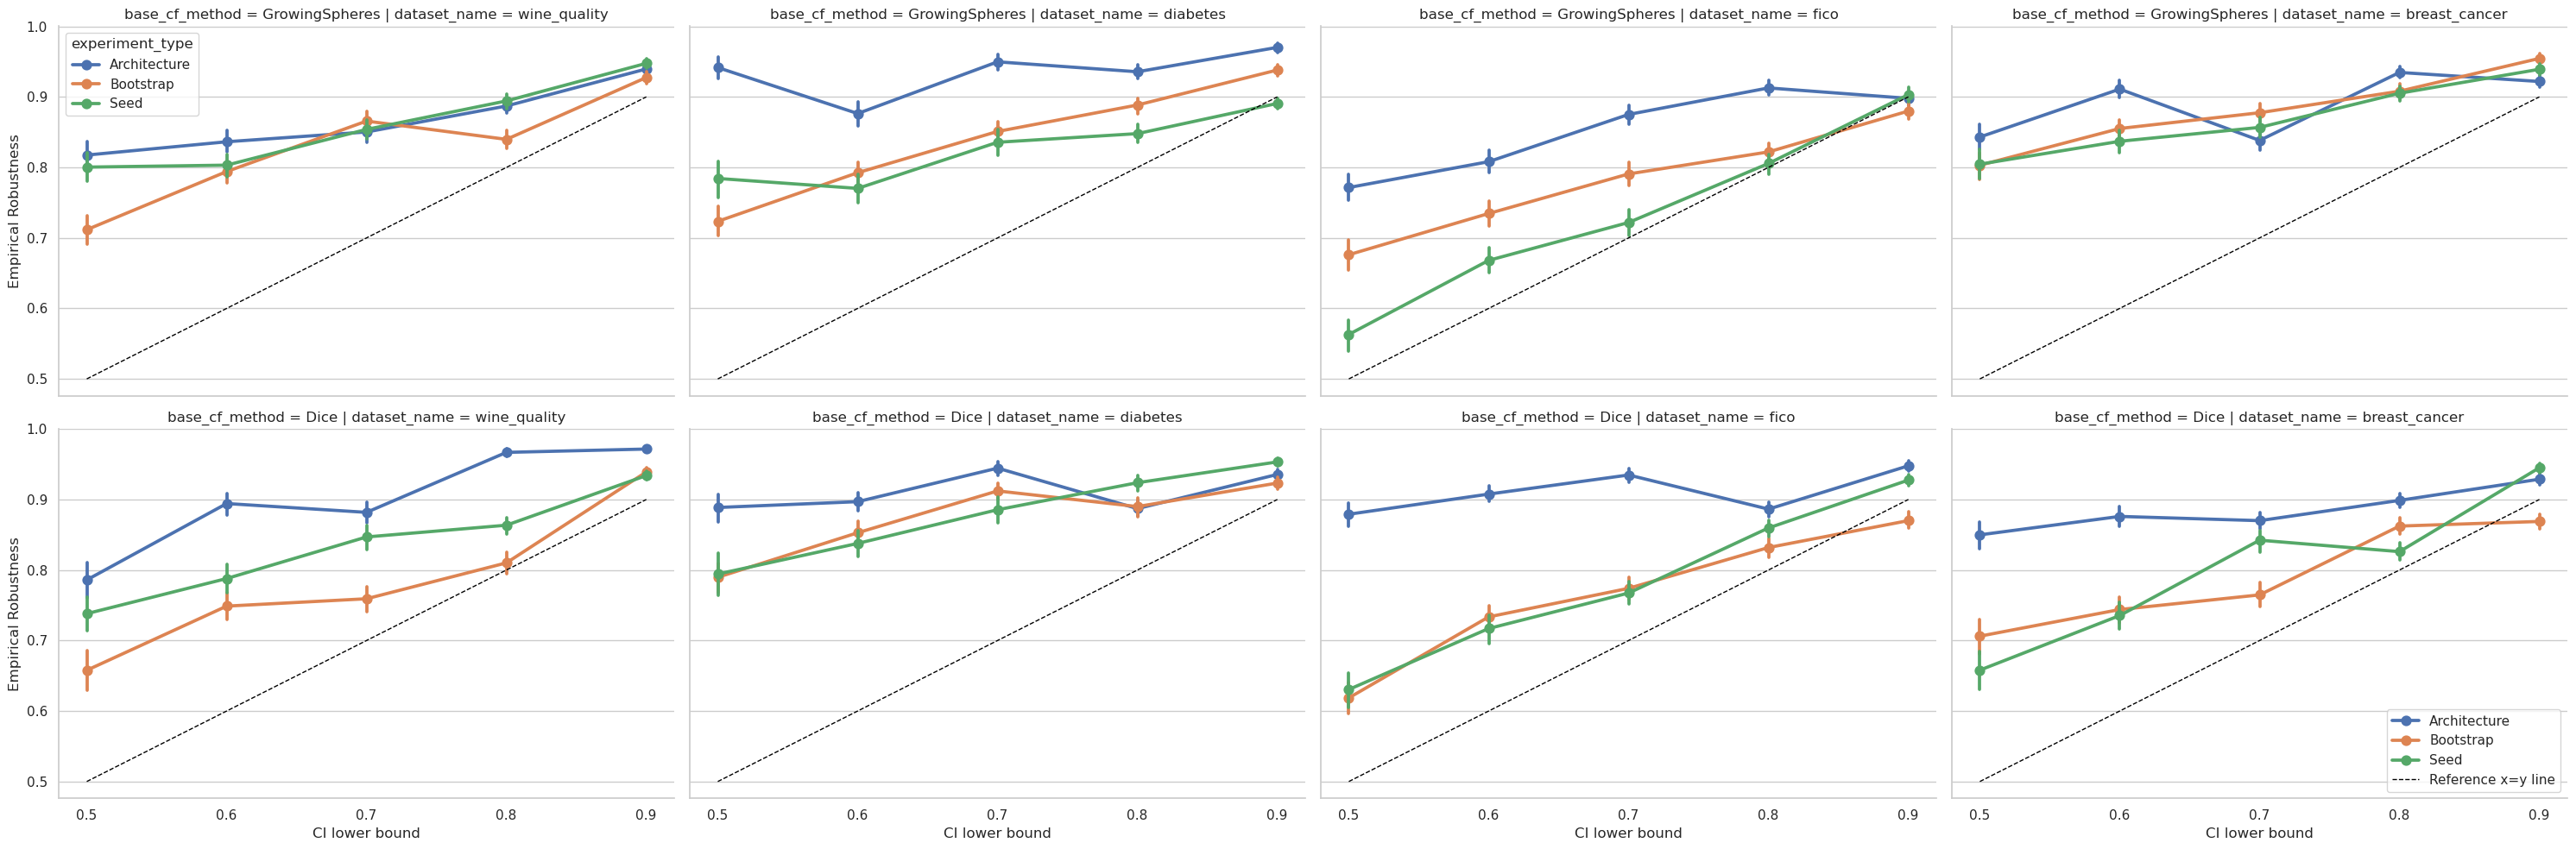

In [16]:
# Split by expeirment type (hue) and dataset (col)
# x-axis: lower bound discretized
# y-axis: average empirical robustness

_tmp_df = nn_df.copy()
lb_threshs = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
_tmp_df['CI lower bound'] = pd.cut(_tmp_df['lower_bound_beta'], bins=lb_threshs, labels=lb_threshs[:-1])
_tmp_df['CI midpoint'] = (_tmp_df['lower_bound_beta'] + _tmp_df['upper_bound_beta']) / 2
_tmp_df['CI midpoint'] = pd.cut(_tmp_df['CI midpoint'], bins=lb_threshs, labels=lb_threshs[:-1])
_tmp_df['Empirical Robustness'] = _tmp_df['robust_counterfactual_validity_model2'].astype(float)

# Print counts for each k_mlps_in_B
print(_tmp_df['k_mlps_in_B'].value_counts())

g = sns.catplot(data=_tmp_df, 
            x='CI lower bound',
            y='Empirical Robustness',
            hue='experiment_type', 
            col='dataset_name', 
            row='base_cf_method',
            kind='point', 
            # palette=colors_discrete, 
            # markers=markers, 
            height=5, 
            aspect=1.5,
            legend_out=False,
)
for ax in g.axes.flat:
    ax.plot(list(range(5)), lb_threshs[:-1], color='black', linestyle='--', linewidth=1, label='Reference x=y line')

plt.legend()
plt.savefig(f'{images_dir}/1_robustness_vs_ci_lower_bound.png', dpi=300, bbox_inches='tight')

<div style="background-color: #AA0000; color: white; text-align: center; font-weight: bold">[2] Is the empirical validity δ-Robust?</div>

/tmp/ipykernel_10938/4199390341.py:108: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


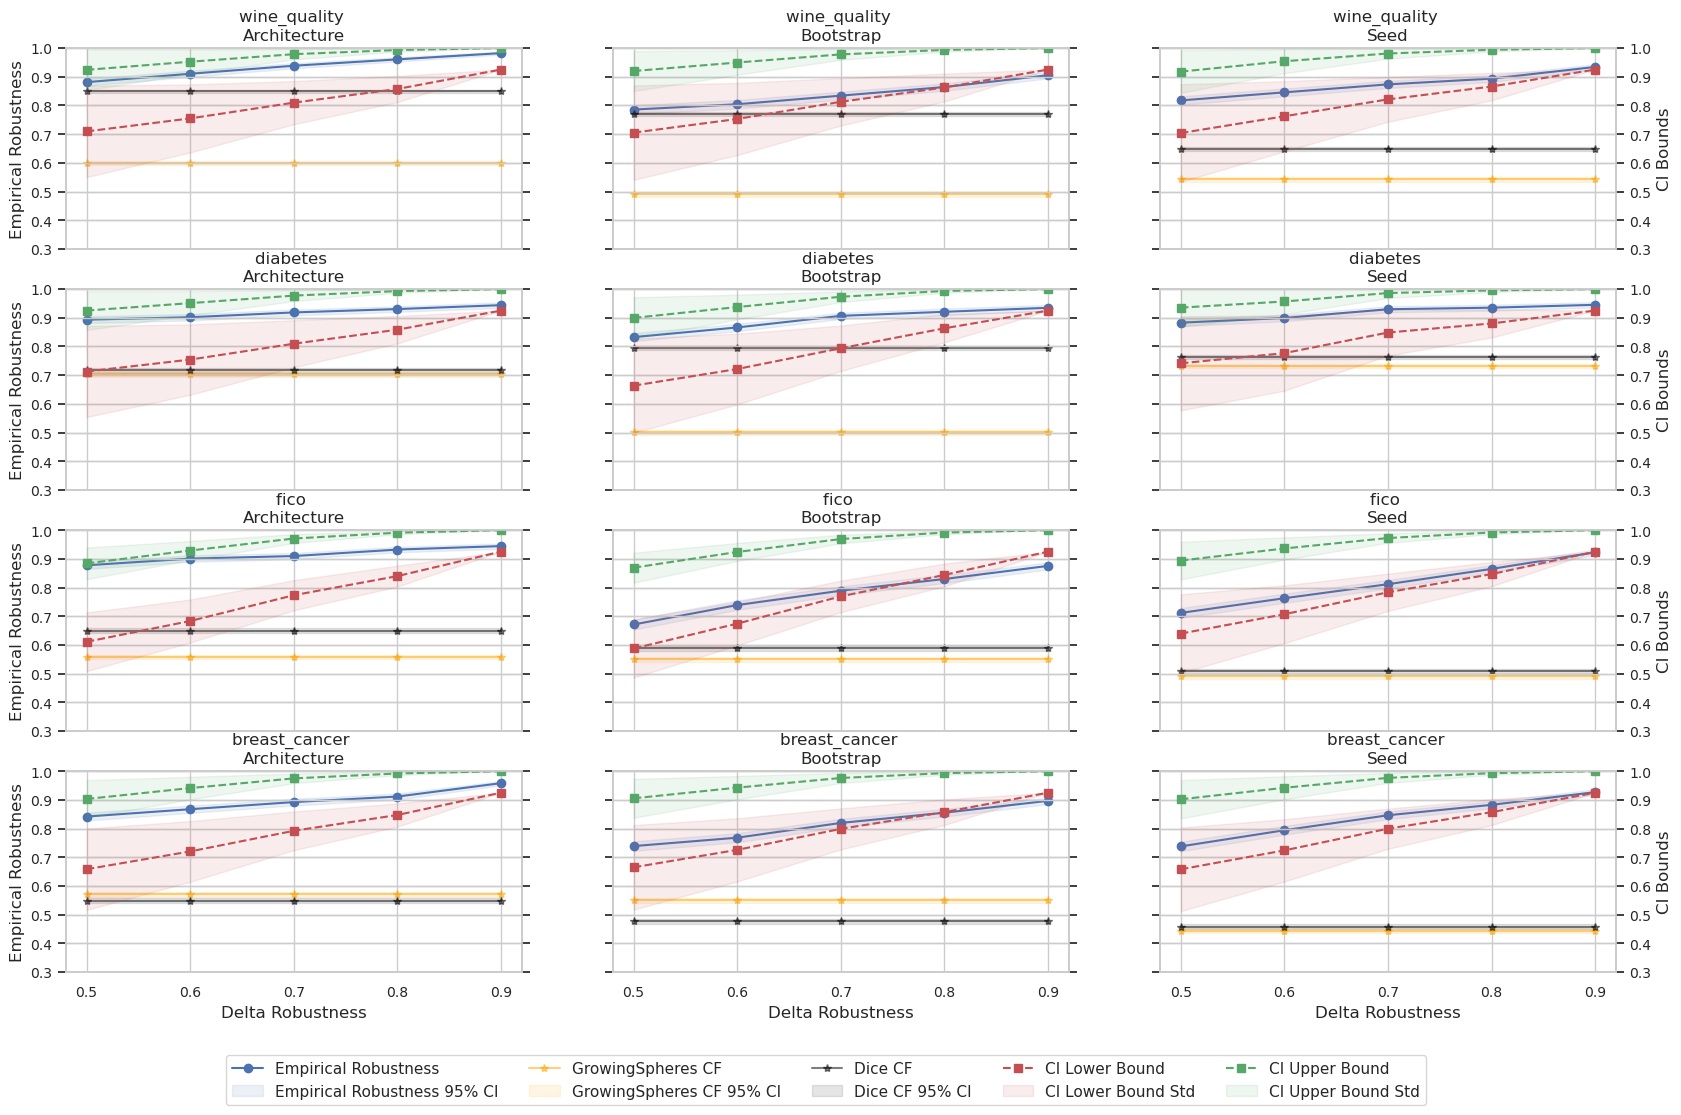

In [63]:
# Use only matplotlib 
# x-axis: delta_robsutness
# y-axis: empirical robustness
# twin y-axis: CI lower and upper bounds
# row: dataset
# col: experiment type

_tmp_df = nn_df.copy()
method='Dice'

datasets = _tmp_df['dataset_name'].unique()
experiment_types = _tmp_df['experiment_type'].unique()
delta_robustness = _tmp_df['delta_robustness'].unique().tolist()
delta_robustness.sort()
# Set fontsize to 11
rows = max(2, len(datasets))
cols = max(2, len(experiment_types))
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 12), sharex=True, sharey=True)



for i, dataset in enumerate(datasets):
    for j, experiment_type in enumerate(experiment_types):
        _df_fil = _tmp_df[(_tmp_df['dataset_name'] == dataset) & (_tmp_df['experiment_type'] == experiment_type)]
        _df = _df_fil[_df_fil['base_cf_method'] == method]
        
        data = _df.groupby('delta_robustness')['robust_counterfactual_validity_model2'].mean()
        
        ax = axes[i, j]
        ax.plot(delta_robustness, data, marker='o', linestyle='-', color='b', label='Empirical Robustness')
        emprob_ci = 1.96 * _df.groupby('delta_robustness')['robust_counterfactual_validity_model2'].std() / np.sqrt(_df.groupby('delta_robustness')['robust_counterfactual_validity_model2'].count())
        ax.fill_between(delta_robustness, data - emprob_ci, data + emprob_ci, color='b', alpha=0.1, label='Empirical Robustness 95% CI')
        
        ax.set_title(f'{dataset} \n{experiment_type}')
        
        if i == len(datasets) - 1:
            ax.set_xlabel('Delta Robustness')
        # ax.set_xlabel('Delta Robustness')
        if j == 0:
            ax.set_ylabel('Empirical Robustness')
        
        
        data_lower = _df.groupby('delta_robustness')['lower_bound_beta'].mean()
        data_upper = _df.groupby('delta_robustness')['upper_bound_beta'].mean()
        
        ax2 = ax.twinx()
        
        ax2.plot(delta_robustness, data_lower, marker='s', linestyle='--', color='r', label='CI Lower Bound')
        # add yerr for lower bound
        lb_std = _df.groupby('delta_robustness')['lower_bound_beta'].std()
        ax2.fill_between(delta_robustness, data_lower - lb_std, data_lower + lb_std, color='r', alpha=0.1, label='CI Lower Bound Std')


        
        ax2.plot(delta_robustness, data_upper, marker='s', linestyle='--', color='g', label='CI Upper Bound')
        # add yerr
        ub_std = _df.groupby('delta_robustness')['upper_bound_beta'].std()
        ax2.fill_between(delta_robustness, data_upper - ub_std, data_upper + ub_std, color='g', alpha=0.1, label='CI Upper Bound Std')
        
        
        if j == len(experiment_types) - 1:
            ax2.set_ylabel('CI Bounds')
        
        # sns.stripplot(data=_df.sample(500), x='delta_robustness', y='lower_bound_beta', ax=ax2, color='r', alpha=0.5)
        # sns.stripplot(data=_df.sample(500), x='delta_robustness', y='upper_bound_beta', ax=ax2, color='g', alpha=0.5)
        
        
        #Plot baseline
        for m, color in zip(['GrowingSpheres', 'Dice'], ['orange', 'black']):
            __df = _df_fil[_df_fil['base_cf_method'] == m]
            base = __df['base_counterfactual_validity_model2'].mean()
            base_std = __df['base_counterfactual_validity_model2'].std()
            base_ci = 1.96 * base_std / np.sqrt(__df['base_counterfactual_validity_model2'].count())
            ax.plot(delta_robustness, [base] * len(delta_robustness), color=color, linestyle='-', label=f'{m} CF', marker='*', alpha=0.5)
            ax.fill_between(delta_robustness, base - base_ci, base + base_ci, color=color, alpha=0.1, label=f'{m} CF 95% CI')
        
        l = 0.3
        ax.set_ylim(l, 1)
        ax2.set_ylim(l, 1)
        ax.set_xticks([0.5, 0.6, 0.7, 0.8, 0.9])
        # Make x-axis labels more coarse i.e. only show rounded to tenths

        # ax_lim = ax.get_xlim()
        # ax.set_xticks(np.arange(ax_lim[0], ax_lim[1], 0.1).round(1))
        
        if i == len(datasets) - 1 and j == 0:
            ax_legend_handles, ax_legend_labels = ax.get_legend_handles_labels()
            ax2_legend_handles, ax2_legend_labels = ax2.get_legend_handles_labels()
            
            ax.legend(ax_legend_handles + ax2_legend_handles, 
                      ax_legend_labels + ax2_legend_labels, 
                      ncol=5, 
                      loc='lower right',
                      bbox_to_anchor=(3, -0.7)
            )
            
            
        # Decrease font size of the labels
        ax.tick_params(axis='both', which='major', labelsize=10)
        ax2.tick_params(axis='both', which='major', labelsize=10)
        
        # Turn off label ticks for ax2 on the plots that are not on the right
        if j != len(experiment_types) - 1:
            ax2.set_yticklabels([])
           
plt.savefig(f'{images_dir}/2_empirical_robustness_ci_bounds_{method}.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()


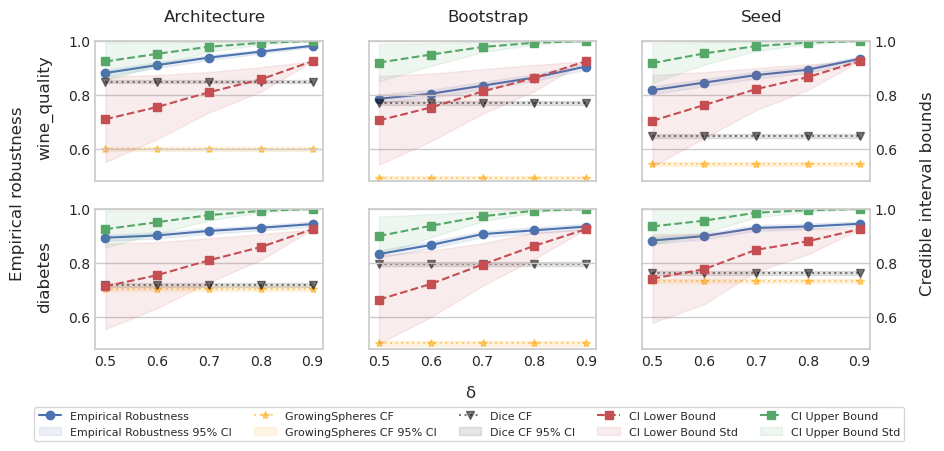

In [18]:
# Use only matplotlib 
# x-axis: delta_robsutness
# y-axis: empirical robustness
# twin y-axis: CI lower and upper bounds
# row: dataset
# col: experiment type

_tmp_df = nn_df.copy()
method='GrowingSpheres'

datasets = ['wine_quality', 'diabetes'] 
experiment_types = _tmp_df['experiment_type'].unique()
delta_robustness = _tmp_df['delta_robustness'].unique().tolist()
delta_robustness.sort()
# Set fontsize to 11
rows = max(2, len(datasets))
cols = max(2, len(experiment_types))
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(10, 4), sharex=True, sharey=True)



for i, dataset in enumerate(datasets):
    for j, experiment_type in enumerate(experiment_types):
        _df_fil = _tmp_df[(_tmp_df['dataset_name'] == dataset) & (_tmp_df['experiment_type'] == experiment_type)]
        _df = _df_fil[_df_fil['base_cf_method'] == method]
        
        data = _df.groupby('delta_robustness')['robust_counterfactual_validity_model2'].mean()
        
        ax = axes[i, j]
        ax.plot(delta_robustness, data, marker='o', linestyle='-', color='b', label='Empirical Robustness')
        emprob_ci = 1.96 * _df.groupby('delta_robustness')['robust_counterfactual_validity_model2'].std() / np.sqrt(_df.groupby('delta_robustness')['robust_counterfactual_validity_model2'].count())
        ax.fill_between(delta_robustness, data - emprob_ci, data + emprob_ci, color='b', alpha=0.1, label='Empirical Robustness 95% CI')
        
        # ax.set_title(f'{dataset} \n{experiment_type}')
        
        
        data_lower = _df.groupby('delta_robustness')['lower_bound_beta'].mean()
        data_upper = _df.groupby('delta_robustness')['upper_bound_beta'].mean()
        
        ax2 = ax.twinx()
        
        ax2.plot(delta_robustness, data_lower, marker='s', linestyle='--', color='r', label='CI Lower Bound')
        # add yerr for lower bound
        lb_std = _df.groupby('delta_robustness')['lower_bound_beta'].std()
        ax2.fill_between(delta_robustness, data_lower - lb_std, data_lower + lb_std, color='r', alpha=0.1, label='CI Lower Bound Std')
        
        ax2.plot(delta_robustness, data_upper, marker='s', linestyle='--', color='g', label='CI Upper Bound')
        # add yerr
        ub_std = _df.groupby('delta_robustness')['upper_bound_beta'].std()
        ax2.fill_between(delta_robustness, data_upper - ub_std, data_upper + ub_std, color='g', alpha=0.1, label='CI Upper Bound Std')
        
        #Plot baseline
        linestyles = [':', ':']
        markers = ['*', 'v', 's']
        for k, (m, color) in enumerate(zip(['GrowingSpheres', 'Dice'], ['orange', 'black'])):
            __df = _df_fil[_df_fil['base_cf_method'] == m]
            base = __df['base_counterfactual_validity_model2'].mean()
            base_std = __df['base_counterfactual_validity_model2'].std()
            base_ci = 1.96 * base_std / np.sqrt(__df['base_counterfactual_validity_model2'].count())
            ax.plot(delta_robustness, [base] * len(delta_robustness), color=color, linestyle=linestyles[k], label=f'{m} CF', marker=markers[k], alpha=0.5)
            ax.fill_between(delta_robustness, base - base_ci, base + base_ci, color=color, alpha=0.1, label=f'{m} CF 95% CI')
        
        l = 0.48
        ax.set_ylim(l, 1)
        ax2.set_ylim(l, 1)
        ax.set_xticks([0.5, 0.6, 0.7, 0.8, 0.9])
            
        # Decrease font size of the labels
        ax.tick_params(axis='both', which='major', labelsize=10)
        ax2.tick_params(axis='both', which='major', labelsize=10)
        
        # Turn off label ticks for ax2 on the plots that are not on the right
        if j != len(experiment_types) - 1:
            ax2.set_yticklabels([])
            
        # Remove the outline of the plot
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        
        
        ax.tick_params(axis=u'both', which=u'both',length=0)
        ax2.tick_params(axis=u'both', which=u'both',length=0)
        
        # Remove grid
        ax.grid(False)
        
        handles, labels = ax.get_legend_handles_labels()    
        handles_2, labels_2 = ax2.get_legend_handles_labels()
        
        handles_combined = handles + handles_2
        labels_combined = labels + labels_2
        
fig.text(0.5, -0.01, '\u03b4', ha='center')
fig.text(0.04, 0.5, 'Empirical robustness', va='center', rotation='vertical')
fig.text(0.95, 0.5, 'Credible interval bounds', va='center', rotation='vertical')

# Set titles for the rows with the dataset names
for ax, row in zip(axes[:,0], datasets):
    rowlen = len(row)
    fig.text(ax.get_position().x0 - 0.05 , ax.get_position().y0 + 0.8 * (1/rowlen), row, ha='center', rotation='vertical')

# Set titles for the columns
for ax, col in zip(axes[0], experiment_types):
    fig.text(ax.get_position().x0 + 0.12 , ax.get_position().y1 + 0.05, col, ha='center', fontsize=12)

# Create one legend for the entire figure
fig.legend(handles_combined, labels_combined,  bbox_to_anchor=(0.94, -0.02), ncol=5, fontsize=8)
           
plt.savefig(f'{images_dir}/2_empirical_robustness_ci_bounds_paper.png', dpi=300, bbox_inches='tight')

# plt.tight_layout()
plt.show()


<div style="background-color: #AA0000; color: white; text-align: center; font-weight: bold">[3] Comparision to RobX</div>

In [19]:
robx_results_path = results_path + '/robx'
robx_raw_df = process_results(robx_results_path)

Reading results: 100%|██████████| 9/9 [00:07<00:00,  1.13it/s]


In [20]:
robx_raw_df.head(3)

,base_cf_method,model_type_to_use,experiment_type,dataset_name,k_mlps_in_B,fold_i,experiment_generalization_type,beta_confidence,delta_robustness,model2_name,x_test_sample,y_test_sample,model1_pred_proba,model1_pred_crisp,model2_pred_proba,model2_pred_crisp,base_counterfactual,base_counterfactual_model1_pred_proba,base_counterfactual_model1_pred_crisp,base_counterfactual_model2_pred_proba,base_counterfactual_model2_pred_crisp,base_counterfactual_validity,base_counterfactual_proximityL1,base_counterfactual_proximityL2,base_counterfactual_plausibility,base_counterfactual_discriminative_power,base_counterfactual_validity_model2,base_counterfactual_time,robust_counterfactual,robust_counterfactual_model1_pred_proba,robust_counterfactual_model1_pred_crisp,robust_counterfactual_model2_pred_proba,robust_counterfactual_model2_pred_crisp,robust_counterfactual_validity,robust_counterfactual_proximityL1,robust_counterfactual_proximityL2,robust_counterfactual_plausibility,robust_counterfactual_discriminative_power,robust_counterfactual_validity_model2,robust_counterfactual_L1_distance_from_base_cf,robust_counterfactual_L2_distance_from_base_cf,robust_counterfactual_time,base_model
0,GrowingSpheres,neural_network,Architecture,diabetes,32,1,Architecture,0.7,0.01,Model2_11,"[0.7857142857142857, 0.696969696969697, 0.6666...",0,0.734939,1,0.724627,1,"[0.8103538767393335, 0.6053736527111419, 0.637...",0.470371,0,0.449613,0,1,0.409785,0.158838,0.269307,0.533333,1,0.002746,"[0.6773432350183033, 0.4134079277534613, 0.674...",0.119903,0.0,0.118728,0.0,1.0,0.768407,0.381826,0.258264,0.733333,1.0,0.594942,0.07924,0.142122,NeuralNetwork
1,GrowingSpheres,neural_network,Architecture,diabetes,32,1,Architecture,0.7,0.01,Model2_12,"[0.7857142857142857, 0.696969696969697, 0.6666...",0,0.734939,1,0.652201,1,"[0.8103538767393335, 0.6053736527111419, 0.637...",0.470371,0,0.449613,0,1,0.409785,0.158838,0.269307,0.533333,1,0.002746,"[0.6773432350183033, 0.4134079277534613, 0.674...",0.119903,0.0,0.126338,0.0,1.0,0.768407,0.381826,0.258264,0.733333,1.0,0.594942,0.07924,0.141538,NeuralNetwork
2,GrowingSpheres,neural_network,Architecture,diabetes,32,1,Architecture,0.7,0.01,Model2_13,"[0.7857142857142857, 0.696969696969697, 0.6666...",0,0.734939,1,0.785541,1,"[0.8103538767393335, 0.6053736527111419, 0.637...",0.470371,0,0.449613,0,1,0.409785,0.158838,0.269307,0.533333,1,0.002746,"[0.6773432350183033, 0.4134079277534613, 0.674...",0.119903,0.0,0.145830,0.0,1.0,0.768407,0.381826,0.258264,0.733333,1.0,0.594942,0.07924,0.141938,NeuralNetwork


In [21]:
robx_raw_df.rename(columns={'beta_confidence': 'tau', 'delta_robustness': 'variance'}, inplace=True)

In [22]:
robx_nn_gs_df = robx_raw_df[(robx_raw_df['base_model'] == 'NeuralNetwork') & (robx_raw_df['base_cf_method'] == 'GrowingSpheres')]
robx_nn_dice_df = robx_raw_df[(robx_raw_df['base_model'] == 'NeuralNetwork') & (robx_raw_df['base_cf_method'] == 'Dice')]
robx_nn_df = robx_raw_df[robx_raw_df['base_model'] == 'NeuralNetwork']
robx_dt_gs_df = robx_raw_df[(robx_raw_df['base_model'] == 'DecisionTree') & (robx_raw_df['base_cf_method'] == 'GrowingSpheres')]
robx_dt_dice_df = robx_raw_df[(robx_raw_df['base_model'] == 'DecisionTree') & (robx_raw_df['base_cf_method'] == 'Dice')]
robx_dt_df = robx_raw_df[robx_raw_df['base_model'] == 'DecisionTree']

print(f'Lengths of the dataframes: NN GS: {len(robx_nn_gs_df)}, NN Dice: {len(robx_nn_dice_df)}, DT GS: {len(robx_dt_gs_df)}, DT Dice: {len(robx_dt_dice_df)}')

Lengths of the dataframes: NN GS: 258804, NN Dice: 0, DT GS: 0, DT Dice: 0


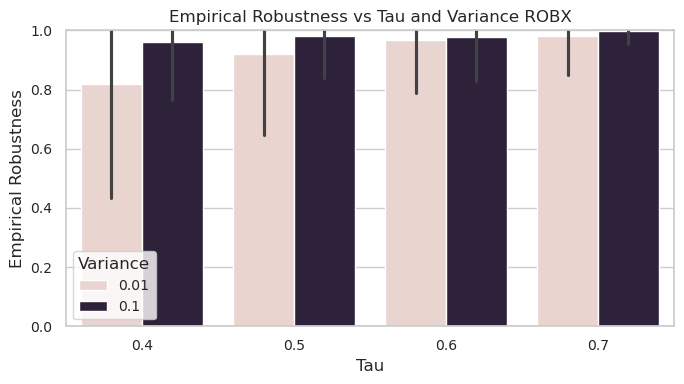

In [23]:
fig, ax = plt.subplots(figsize=(7, 4))
# Change font size
sns.set_theme(style='whitegrid', font_scale=1)
sns.barplot(data=robx_raw_df, x='tau', y='robust_counterfactual_validity_model2', hue='variance', errorbar='sd')
plt.title('Empirical Robustness vs Tau and Variance ROBX')
plt.ylabel('Empirical Robustness')
plt.xlabel('Tau')
plt.ylim(0, 1)

# Change font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Change legend font size
plt.legend(fontsize=10, title='Variance')

plt.tight_layout()
plt.savefig(f'{images_dir}/3_empirical_robustness_vs_tau_variance.png', dpi=300, bbox_inches='tight')

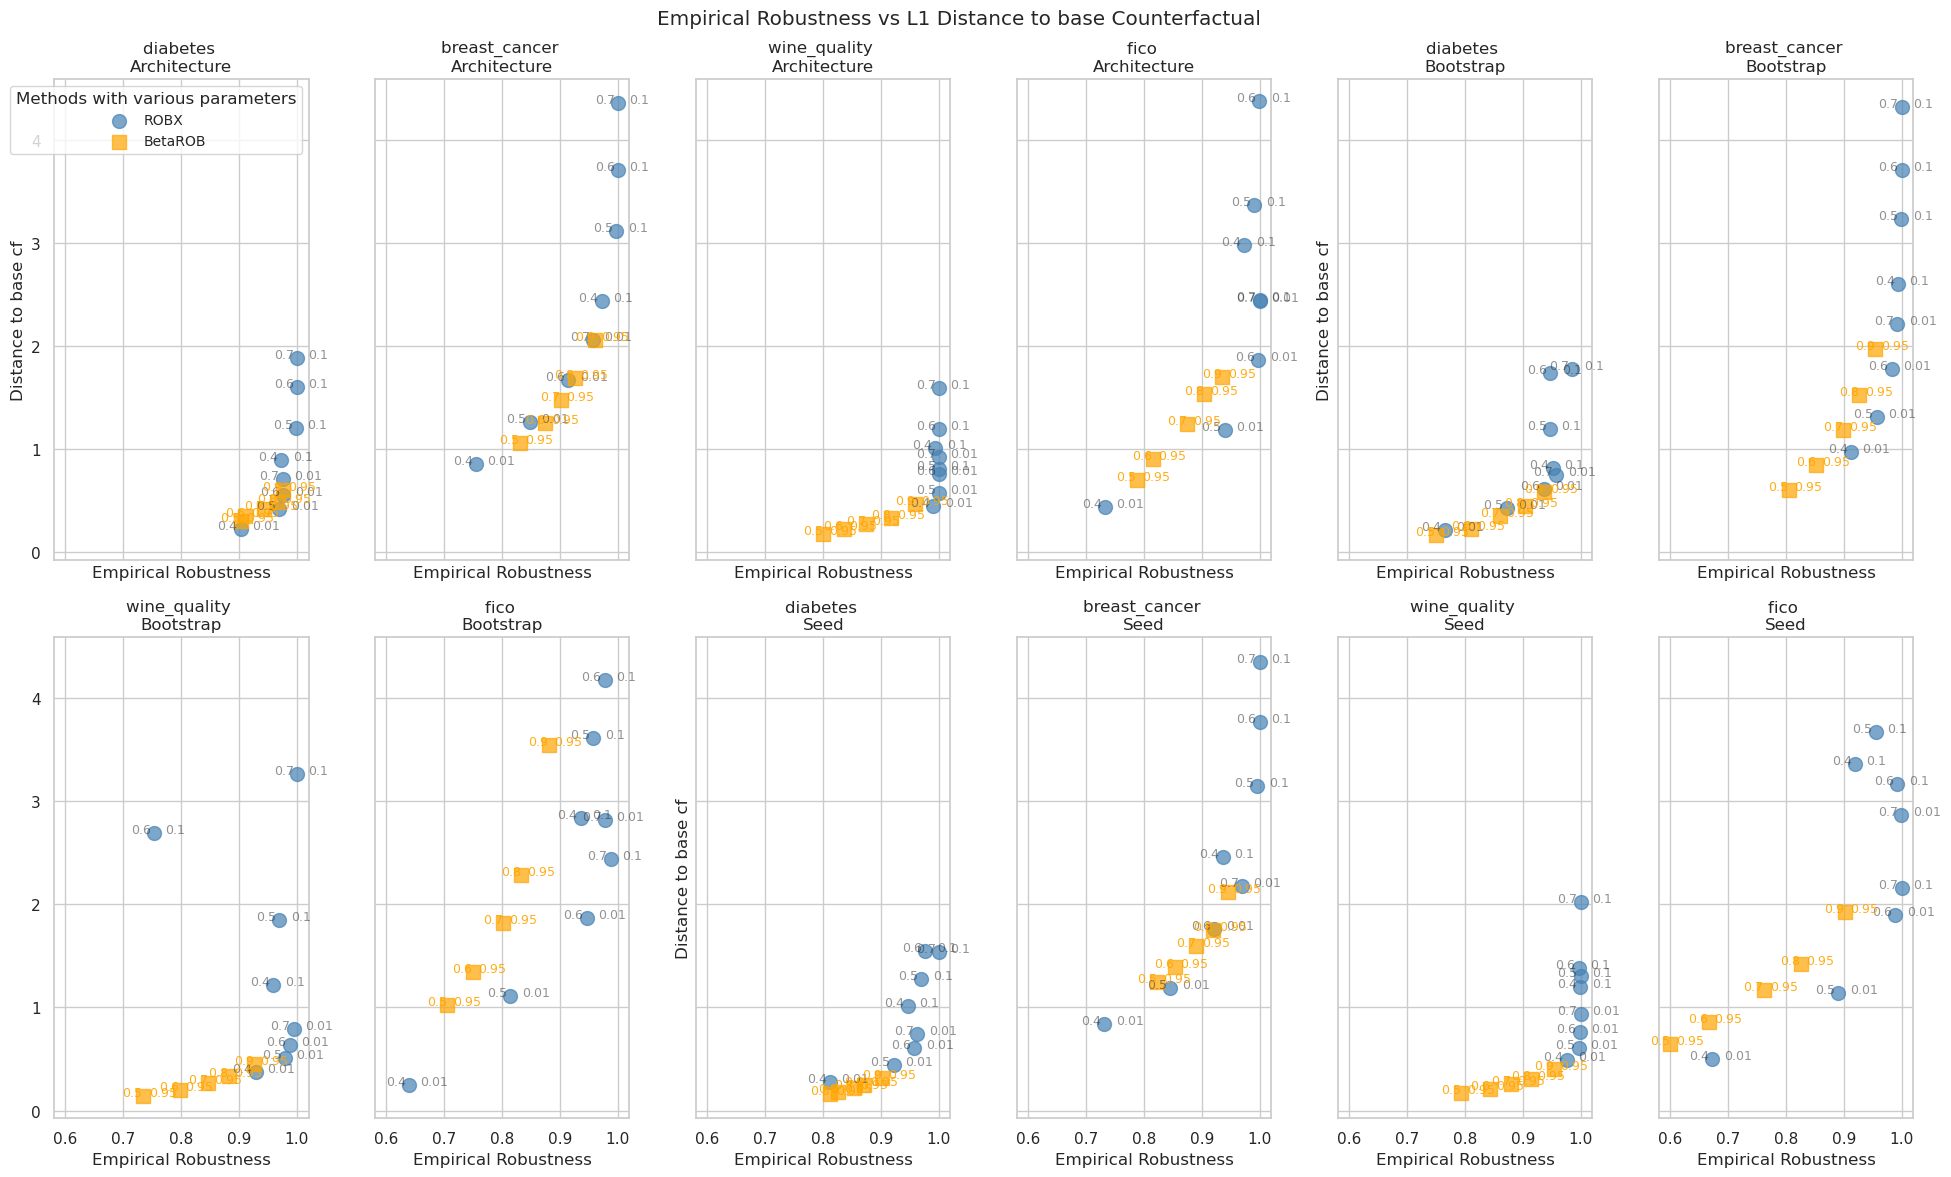

In [24]:
_robx_tmp_df = robx_nn_gs_df.copy()
_betarob_tmp_df = nn_gs_df.copy()


datasets = _robx_tmp_df['dataset_name'].unique()
experiment_types = _robx_tmp_df['experiment_type'].unique()

rows = len(experiment_types) // 2 + 1
cols = len(datasets) + len(experiment_types) // 2 + len(experiment_types) % 2

fig, axes = plt.subplots(ncols=cols, nrows=rows, figsize=(20, 12), sharex=True, sharey=True)




ax = axes.flatten()
ite = 0
for i, experiment_type in enumerate(experiment_types):
    for j, dataset in enumerate(datasets):
        
        
        tmp_robx_df = _robx_tmp_df.copy()
        tmp_robx_df = tmp_robx_df[(tmp_robx_df['dataset_name'] == dataset) & (tmp_robx_df['experiment_type'] == experiment_type)]
        tmp_robx_df['robust_counterfactual_validity_model2'] = tmp_robx_df['robust_counterfactual_validity_model2'].astype(float)
        robx_agg_empirical = tmp_robx_df.groupby(['tau', 'variance'])['robust_counterfactual_validity_model2'].mean().reset_index()
        robx_agg_dist_to_baseline = tmp_robx_df.groupby(['tau', 'variance'])['robust_counterfactual_L1_distance_from_base_cf'].mean().reset_index()
        
        tmp_raw_df = _betarob_tmp_df.copy()
        tmp_raw_df = tmp_raw_df[(tmp_raw_df['dataset_name'] == dataset) & (tmp_raw_df['experiment_type'] == experiment_type)]
        tmp_raw_df['robust_counterfactual_validity_model2'] = tmp_raw_df['robust_counterfactual_validity_model2'].astype(float)
        betarob_agg_empirical = tmp_raw_df.groupby(['delta_robustness', 'beta_confidence'])['robust_counterfactual_validity_model2'].mean().reset_index()  
        betarob_agg_dist_to_baseline = tmp_raw_df.groupby(['delta_robustness', 'beta_confidence'])['robust_counterfactual_L1_distance_from_base_cf'].mean().reset_index()


        # Create scatter plot of dist vs empirical for both ROBX and BetaROB
        robx_merge = pd.merge(robx_agg_empirical, robx_agg_dist_to_baseline, on=['tau', 'variance'], suffixes=('_empirical', '_dist'))
        robx_merge['tau_var'] = robx_merge['tau'].astype(str) + '_' + robx_merge['variance'].astype(str)

        betarob_merge = pd.merge(betarob_agg_empirical, betarob_agg_dist_to_baseline, left_on=['delta_robustness', 'beta_confidence'], right_on=['delta_robustness', 'beta_confidence'], suffixes=('_empirical', '_dist'))
        betarob_merge['delta_beta'] = betarob_merge['delta_robustness'].astype(str) + '_' + betarob_merge['beta_confidence'].astype(str)
        
        ax[ite].scatter(x=robx_merge['robust_counterfactual_validity_model2'],
                    y=robx_merge['robust_counterfactual_L1_distance_from_base_cf'],
                    c='steelblue',
                    marker='o',
                    s=100,
                    # cmap='tab10',
                    label='ROBX',
                    alpha=0.7
        )
        
        ax[ite].scatter(x=betarob_merge['robust_counterfactual_validity_model2'],
                    y=betarob_merge['robust_counterfactual_L1_distance_from_base_cf'],
                    c='orange',
                    marker='s',
                    s=100,
                    # cmap='tab10',
                    label='BetaROB',
                    alpha=0.7
        )
        

        ax[ite].set_xlabel('Empirical Robustness')
        
        if j == 0:
            ax[ite].set_ylabel('Distance to base cf')
        ax[ite].set_title(f'{dataset} \n{experiment_type}')
        
        if i == 0 and j == 0:
            ax[ite].legend(title='Methods with various parameters', fontsize=10)
            
            
        # Add labels to the points
        for k, row in robx_merge.iterrows():
            ax[ite].text(row['robust_counterfactual_validity_model2'] - 0.04, 
                         row['robust_counterfactual_L1_distance_from_base_cf'], 
                         row['tau'], 
                         fontsize=9, 
                         alpha=0.5
            )
            ax[ite].text(row['robust_counterfactual_validity_model2'] + 0.02, 
                         row['robust_counterfactual_L1_distance_from_base_cf'], 
                         row['variance'], 
                         fontsize=9, 
                         alpha=0.5
            )
        for k, row in betarob_merge.iterrows():
            ax[ite].text(row['robust_counterfactual_validity_model2'] - 0.035, 
                         row['robust_counterfactual_L1_distance_from_base_cf'], 
                         row['delta_robustness'], 
                         fontsize=9, 
                         alpha=0.9,
                         color='#ffa500',
            )
            ax[ite].text(row['robust_counterfactual_validity_model2'] + 0.01, 
                         row['robust_counterfactual_L1_distance_from_base_cf'] , 
                         row['beta_confidence'], 
                         fontsize=9, 
                         alpha=0.9,
                        color='#ffa500',
            )
        
        ite += 1
            


plt.suptitle('Empirical Robustness vs L1 Distance to base Counterfactual')
plt.tight_layout()

plt.savefig(f'{images_dir}/3_empirical_robustness_vs_l1_distance.png', dpi=300, bbox_inches='tight')


In [65]:
final_df = pd.DataFrame()

_robx_df = robx_nn_gs_df.copy().dropna()
_betarob_df = nn_gs_df.copy().dropna()
_method_df = nn_df.copy().dropna()

for i, experiment_type in enumerate(experiment_types):
    for j, dataset in enumerate(datasets):
        tmp_robx_df = _robx_df.copy()
        tmp_robx_df = tmp_robx_df[(tmp_robx_df['dataset_name'] == dataset) & (tmp_robx_df['experiment_type'] == experiment_type)]
        tmp_robx_df['robust_counterfactual_validity_model2'] = tmp_robx_df['robust_counterfactual_validity_model2'].astype(float)
        robx_agg_empirical = tmp_robx_df.groupby(['tau', 'variance'])[[
            'robust_counterfactual_validity_model2',
            'robust_counterfactual_L1_distance_from_base_cf',
            'robust_counterfactual_proximityL1',
            'robust_counterfactual_plausibility',
            'robust_counterfactual_discriminative_power'
        ]].mean().reset_index()
        robx_agg_empirical['Name'] = 'ROBX-' + robx_agg_empirical['tau'].astype(str) + '-' + robx_agg_empirical['variance'].astype(str)
        robx_agg_empirical = robx_agg_empirical.drop(columns=['tau', 'variance'])
        robx_agg_empirical.rename(columns={
            'robust_counterfactual_validity_model2': 'Empirical Robustness',
            'robust_counterfactual_L1_distance_from_base_cf': 'L1 Distance',
            'robust_counterfactual_proximityL1': 'Proximity L1',
            'robust_counterfactual_plausibility': 'Plausibility',
            'robust_counterfactual_discriminative_power': 'Discriminative Power'
        }, inplace=True)
        
        
        tmp_raw_df = _betarob_df.copy()
        tmp_raw_df = tmp_raw_df[(tmp_raw_df['dataset_name'] == dataset) & (tmp_raw_df['experiment_type'] == experiment_type)]
        tmp_raw_df['robust_counterfactual_validity_model2'] = tmp_raw_df['robust_counterfactual_validity_model2'].astype(float)
        betarob_agg_empirical = tmp_raw_df.groupby(
            ['delta_robustness', 'beta_confidence']
            )[[
                'robust_counterfactual_validity_model2', 
                'robust_counterfactual_L1_distance_from_base_cf',
                'robust_counterfactual_proximityL1',
                'robust_counterfactual_plausibility',
                'robust_counterfactual_discriminative_power'
            ]].mean().reset_index()  
        betarob_agg_empirical['Name'] = 'BetaRCE-' + betarob_agg_empirical['delta_robustness'].astype(str) + '-' + betarob_agg_empirical['beta_confidence'].astype(str)
        betarob_agg_empirical = betarob_agg_empirical.drop(columns=['delta_robustness', 'beta_confidence'])
        betarob_agg_empirical.rename(columns={
            'robust_counterfactual_validity_model2': 'Empirical Robustness',
            'robust_counterfactual_L1_distance_from_base_cf': 'L1 Distance',
            'robust_counterfactual_proximityL1': 'Proximity L1',
            'robust_counterfactual_plausibility': 'Plausibility',
            'robust_counterfactual_discriminative_power': 'Discriminative Power'
        }, inplace=True)
        
        # Add baseline of base cf methods
        tmp_method_df = _method_df.copy()
        tmp_method_df = tmp_method_df[(tmp_method_df['dataset_name'] == dataset) & (tmp_method_df['experiment_type'] == experiment_type)]
        tmp_method_df['robust_counterfactual_validity_model2'] = tmp_method_df['robust_counterfactual_validity_model2'].astype(float)
        method_agg_empirical = tmp_method_df.groupby(
            ['base_cf_method'] 
            )[[
                'base_counterfactual_validity_model2', 
                'base_counterfactual_proximityL1',
                'base_counterfactual_plausibility',
                'base_counterfactual_discriminative_power'
            ]].mean().reset_index()
        method_agg_empirical['Name'] = method_agg_empirical['base_cf_method']
        method_agg_empirical = method_agg_empirical.drop(columns=['base_cf_method'])
        method_agg_empirical.rename(columns={
            'base_counterfactual_validity_model2': 'Empirical Robustness',
            'base_counterfactual_proximityL1': 'Proximity L1',
            'base_counterfactual_plausibility': 'Plausibility',
            'base_counterfactual_discriminative_power': 'Discriminative Power'
        }, inplace=True)   
        
        print(f'ROBX: {robx_agg_empirical.shape}, BetaROB: {betarob_agg_empirical.shape}, Method: {method_agg_empirical.shape}')
        
        joint_df = pd.concat([robx_agg_empirical, betarob_agg_empirical, method_agg_empirical], ignore_index=True)
        joint_df['Dataset'] = dataset
        joint_df['Experiment Type'] = experiment_type
        
        final_df = pd.concat([final_df, joint_df], ignore_index=True)

/tmp/ipykernel_10938/2579766638.py:41: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ]].mean().reset_index()


ROBX: (8, 6), BetaROB: (5, 2), Method: (2, 5)


/tmp/ipykernel_10938/2579766638.py:41: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ]].mean().reset_index()


ROBX: (8, 6), BetaROB: (5, 2), Method: (2, 5)


/tmp/ipykernel_10938/2579766638.py:41: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ]].mean().reset_index()


ROBX: (8, 6), BetaROB: (5, 2), Method: (2, 5)


/tmp/ipykernel_10938/2579766638.py:41: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ]].mean().reset_index()


ROBX: (8, 6), BetaROB: (5, 2), Method: (2, 5)


/tmp/ipykernel_10938/2579766638.py:41: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ]].mean().reset_index()


ROBX: (8, 6), BetaROB: (5, 2), Method: (2, 5)


/tmp/ipykernel_10938/2579766638.py:41: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ]].mean().reset_index()


ROBX: (8, 6), BetaROB: (5, 2), Method: (2, 5)


/tmp/ipykernel_10938/2579766638.py:41: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ]].mean().reset_index()


ROBX: (8, 6), BetaROB: (5, 2), Method: (2, 5)


/tmp/ipykernel_10938/2579766638.py:41: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ]].mean().reset_index()


ROBX: (8, 6), BetaROB: (5, 2), Method: (2, 5)


/tmp/ipykernel_10938/2579766638.py:41: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ]].mean().reset_index()


ROBX: (8, 6), BetaROB: (5, 2), Method: (2, 5)


/tmp/ipykernel_10938/2579766638.py:41: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ]].mean().reset_index()


ROBX: (8, 6), BetaROB: (5, 2), Method: (2, 5)


/tmp/ipykernel_10938/2579766638.py:41: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ]].mean().reset_index()


ROBX: (8, 6), BetaROB: (5, 2), Method: (2, 5)
ROBX: (8, 6), BetaROB: (5, 2), Method: (2, 5)


/tmp/ipykernel_10938/2579766638.py:41: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ]].mean().reset_index()


In [67]:
vis_df = final_df.set_index(['Experiment Type', 'Dataset' , 'Name']).round(3)
# vis_df = vis_df[np.abs(vis_df['Empirical Robustness'] - 0.85) < 0.1]
vis_df = vis_df[vis_df.index.get_level_values('Experiment Type').str.contains('')]
vis_df = vis_df[~vis_df.index.get_level_values('Dataset').str.contains('breast_cancer')]

vis_df['distto90'] = np.abs(vis_df['Empirical Robustness'] - 0.9)

# # # For each combination of experiment type and dataset, show the top 2 results of ROBX and BetaROB closest to 0.85 empirical robustness
# vis_df_rob = vis_df[vis_df.index.get_level_values('Name').str.contains('ROBX')].groupby(['Experiment Type', 'Dataset']).apply(lambda x: x.nsmallest(2, 'distto90'))
# vis_df_betarob = vis_df[vis_df.index.get_level_values('Name').str.contains('BetaRCE')].groupby(['Experiment Type', 'Dataset']).apply(lambda x: x.nsmallest(2, 'distto90'))
# vis_df_method_gs = vis_df[vis_df.index.get_level_values('Name').str.contains('GrowingSpheres')].groupby(['Experiment Type', 'Dataset']).apply(lambda x: x.nsmallest(2, 'distto90'))
# vis_df_method_dice = vis_df[vis_df.index.get_level_values('Name').str.contains('Dice')].groupby(['Experiment Type', 'Dataset']).apply(lambda x: x.nsmallest(2, 'distto90'))


vis_df_rob = vis_df[vis_df.index.get_level_values('Name').str.contains('ROBX')].groupby(['Experiment Type', 'Dataset'])
vis_df_betarob = vis_df[vis_df.index.get_level_values('Name').str.contains('BetaRCE')].groupby(['Experiment Type', 'Dataset'])
vis_df_method_gs = vis_df[vis_df.index.get_level_values('Name').str.contains('GrowingSpheres')].groupby(['Experiment Type', 'Dataset'])
vis_df_method_dice = vis_df[vis_df.index.get_level_values('Name').str.contains('Dice')].groupby(['Experiment Type', 'Dataset'])
# print(vis_df_method)

# Drop extra index level
vis_df_rob.index = vis_df_rob.index.droplevel([2,3])
vis_df_betarob.index = vis_df_betarob.index.droplevel([2,3])
# vis_df_method = vis_df_method.droplevel([2])

# Join on the index
vis_df_final = pd.concat([vis_df_rob, vis_df_betarob, vis_df_method_dice, vis_df_method_gs], axis=0)


# # Organize the index
# vis_df_final = vis_df_final.sort_index() 

# Swap the levels
vis_df_final = vis_df_final.swaplevel(0, 1)
vis_df_final = vis_df_final.sort_index() 

# # Drop the distto90 column
vis_df_final = vis_df_final.drop(columns=['distto90'])


vis_df_final

AttributeError: 'DataFrameGroupBy' object has no attribute 'index'

In [27]:
# Rename the columns to shorter names
vis_df_final.columns = ['Emp. Rob.', 'Dist. to Base', 'Prox. L1', 'Plaus.', 'Disc. Pow.']
# Rename Experiment types to shorter names
vis_df_final = vis_df_final.rename(index={'Architecture': 'Arch.', 'Bootstrap': 'Btstrp.', 'Bootstrap-Architecture': 'Btstrp. Arch.'})
# Rename datasets to shorter names
vis_df_final = vis_df_final.rename(index={'fico': 'HELOC', 'wine_quality': 'Wine'})

# Create latex table with .3f precision
latex_table = vis_df_final.style \
        .format(precision=3) \
        .to_latex(
            caption='Top 2 results closest to 0.85 empirical robustness for RobX and BetaRCE.',
            label='tab:comparison',
        )

# Save the latex table
with open(f'{images_dir}/4_empirical_robustness_closest_to_0.85.tex', 'w') as f:
    f.write(latex_table)

In [28]:
vis_df = final_df.set_index(['Experiment Type', 'Dataset' , 'Name']).round(3)
# vis_df = vis_df[np.abs(vis_df['Empirical Robustness'] - 0.85) < 0.1]
vis_df = vis_df[vis_df.index.get_level_values('Experiment Type').str.contains('')]
# vis_df = vis_df[~vis_df.index.get_level_values('Dataset').str.contains('breast_cancer')]

vis_df['distto90'] = np.abs(vis_df['Empirical Robustness'] - 0.9)

# # For each combination of experiment type and dataset, show the top 2 results of ROBX and BetaROB closest to 0.85 empirical robustness
vis_df_rob = vis_df[vis_df.index.get_level_values('Name').str.contains('ROBX')].groupby(['Experiment Type', 'Dataset']).apply(lambda x: x.nsmallest(2, 'distto90'))
vis_df_betarob = vis_df[vis_df.index.get_level_values('Name').str.contains('BetaRCE')].groupby(['Experiment Type', 'Dataset']).apply(lambda x: x.nsmallest(2, 'distto90'))
vis_df_method_gs = vis_df[vis_df.index.get_level_values('Name').str.contains('GrowingSpheres')].groupby(['Experiment Type', 'Dataset']).apply(lambda x: x.nsmallest(2, 'distto90'))
vis_df_method_dice = vis_df[vis_df.index.get_level_values('Name').str.contains('Dice')].groupby(['Experiment Type', 'Dataset']).apply(lambda x: x.nsmallest(2, 'distto90'))
# vis_df_method = vis_df[vis_df.index.get_level_values('Name').str.contains('D')].groupby(['Experiment Type', 'Dataset']).apply(lambda x: x.nsmallest(1, 'distto90'))
# print(vis_df_method)

# Drop extra index level
vis_df_rob.index = vis_df_rob.index.droplevel([2,3])
vis_df_betarob.index = vis_df_betarob.index.droplevel([2,3])
# vis_df_method = vis_df_method.droplevel([2])

# Join on the index
vis_df_final = pd.concat([vis_df_rob, vis_df_betarob, vis_df_method_dice, vis_df_method_gs], axis=0)


# # Organize the index
# vis_df_final = vis_df_final.sort_index() 

# Swap the levels
vis_df_final = vis_df_final.swaplevel(0, 1)
vis_df_final = vis_df_final.sort_index() 

# # Drop the distto90 column
vis_df_final = vis_df_final.drop(columns=['distto90'])

# Rename the columns to shorter names
vis_df_final.columns = ['Emp. Rob.', 'Dist. to Base', 'Prox. L1', 'Plaus.', 'Disc. Pow.']
# Rename Experiment types to shorter names
vis_df_final = vis_df_final.rename(index={'Architecture': 'Arch.', 'Bootstrap': 'Btstrp.', 'Bootstrap-Architecture': 'Btstrp. Arch.'})
# Rename datasets to shorter names
vis_df_final = vis_df_final.rename(index={'fico': 'HELOC', 'wine_quality': 'Wine', 'breast_cancer': 'Br. Cancer'})

# Create latex table with .3f precision
latex_table = vis_df_final.style \
        .format(precision=3) \
        .to_latex(
            caption='Top 2 results closest to 0.9 empirical robustness for RobX and BetaRCE.',
            label='tab:comparison',
        )

# Save the latex table
with open(f'{images_dir}/4_empirical_robustness_closest_to_0.85_APPENDIX.tex', 'w') as f:
    f.write(latex_table)

/tmp/ipykernel_10938/2439424001.py:11: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  vis_df_method_gs = vis_df[vis_df.index.get_level_values('Name').str.contains('GrowingSpheres')].groupby(['Experiment Type', 'Dataset']).apply(lambda x: x.nsmallest(2, 'distto90'))
/tmp/ipykernel_10938/2439424001.py:12: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this

In [75]:
_robx_df = robx_nn_gs_df.copy().dropna()
_betarob_df = nn_gs_df.copy().dropna()
_method_df = nn_df.copy().dropna()

columns_to_keep = [
    'dataset_name',
    'experiment_type',
    'method_name',
    'robust_counterfactual_validity_model2',
    'robust_counterfactual_L1_distance_from_base_cf',
    'robust_counterfactual_proximityL1',
    'robust_counterfactual_plausibility',
    'robust_counterfactual_discriminative_power'
]

rename_names = [
    'Dataset',
    'Experiment Type',
    'Method',
    'Empirical Robustness',
    'Distance to Base',
    'Proximity L1',
    'Plausibility',
    'Discriminative Power'

]

# Process the dataframes

_robx_df['method_name'] = 'RobX' + '-' + _robx_df['tau'].astype(str) + '-' + _robx_df['variance'].astype(str) 
_robx_df = _robx_df[columns_to_keep].rename(columns=dict(zip(columns_to_keep, rename_names)))

_betarob_df['method_name'] = '\u0394-RCE' + '-' + _betarob_df['delta_robustness'].astype(str) + '-' + _betarob_df['beta_confidence'].astype(str)
_betarob_df = _betarob_df[columns_to_keep].rename(columns=dict(zip(columns_to_keep, rename_names)))

_method_df['method_name'] = _method_df['base_cf_method']
_method_df = _method_df[columns_to_keep].rename(columns=dict(zip(columns_to_keep, rename_names)))
                                            
datasets = _robx_df['Dataset'].unique()
experiment_types = _robx_df['Experiment Type'].unique()

robx_grouped = _robx_df.groupby(['Dataset', 'Experiment Type', 'Method'])
robx_grouped = robx_grouped.mean(numeric_only=True)

deltaRCE_grouped = _betarob_df.groupby(['Dataset', 'Experiment Type', 'Method'])
deltaRCE_grouped = deltaRCE_grouped.mean(numeric_only=True)

method_grouped = _method_df.groupby(['Dataset', 'Experiment Type', 'Method'])
method_grouped = method_grouped.mean(numeric_only=True)

In [77]:
robx_grouped

Empirical Robustness  \
Dataset       Experiment Type Method                                
breast_cancer Architecture    RobX-0.4-0.01              0.755185   
                              RobX-0.4-0.1               0.971852   
                              RobX-0.5-0.01              0.847778   
                              RobX-0.5-0.1               0.997407   
                              RobX-0.6-0.01              0.914074   
...                                                           ...   
wine_quality  Seed            RobX-0.5-0.1               1.000000   
                              RobX-0.6-0.01              0.998148   
                              RobX-0.6-0.1               0.996296   
                              RobX-0.7-0.01              1.000000   
                              RobX-0.7-0.1               1.000000   

                                             Distance to Base  Proximity L1  \
Dataset       Experiment Type Method                                          
breast_cancer Architecture    RobX-0.4-0.01          0.850028      3.203393   
                              RobX-0.4-0.1           2.431908      3.571158   
                              RobX-0.5-0.01          1.257618      3.188831   
                              RobX-0.5-0.1           3.112404      3.954375   
                              RobX-0.6-0.01          1.670056      3.228041   
...                                                       ...           ...   
wine_quality  Seed            RobX-0.5-0.1           1.301344      1.400145   
                              RobX-0.6-0.01          0.761460      0.876318   
                              RobX-0.6-0.1           1.378678      1.395716   
                              RobX-0.7-0.01          0.937012      1.043065   
                              RobX-0.7-0.1           2.018096      2.023514   

                                             Plausibility  \
Dataset       Experiment Type Method                        
breast_cancer Architecture    RobX-0.4-0.01      0.800504   
                              RobX-0.4-0.1       0.636630   
                              RobX-0.5-0.01      0.747975   
                              RobX-0.5-0.1       0.581244   
                              RobX-0.6-0.01      0.699015   
...                                                   ...   
wine_quality  Seed            RobX-0.5-0.1       0.182205   
                              RobX-0.6-0.01      0.156329   
                              RobX-0.6-0.1       0.249335   
                              RobX-0.7-0.01      0.169612   
                              RobX-0.7-0.1       0.408768   

                                             Discriminative Power  
Dataset       Experiment Type Method                               
breast_cancer Architecture    RobX-0.4-0.01              0.366395  
                              RobX-0.4-0.1               0.682321  
                              RobX-0.5-0.01              0.432790  
                              RobX-0.5-0.1               0.800222  
                              RobX-0.6-0.01              0.517457  
...                                                           ...  
wine_quality  Seed            RobX-0.5-0.1               0.892207  
                              RobX-0.6-0.01              0.893531  
                              RobX-0.6-0.1               0.829877  
                              RobX-0.7-0.01              0.919235  
                              RobX-0.7-0.1               0.714943  

[96 rows x 5 columns]

<div style="background-color: #AA0000; color: white; text-align: center; font-weight: bold">[4_1] Ablation (k mlps sweep)</div>

In [29]:
conf_sweep_results_path = results_path + '/confidence'
conf_sweep_raw_df = process_results(conf_sweep_results_path)

Reading results: 100%|██████████| 3/3 [00:02<00:00,  1.36it/s]


In [30]:
conf_sweep_raw_df['beta_confidence'].value_counts()

0.70    14400
0.80    14400
0.90    14282
0.95    14220
Name: beta_confidence, dtype: int64

In [31]:
conf_sweep_raw_df['delta_robustness'].value_counts()

0.7    19131
0.8    19091
0.9    19080
Name: delta_robustness, dtype: int64

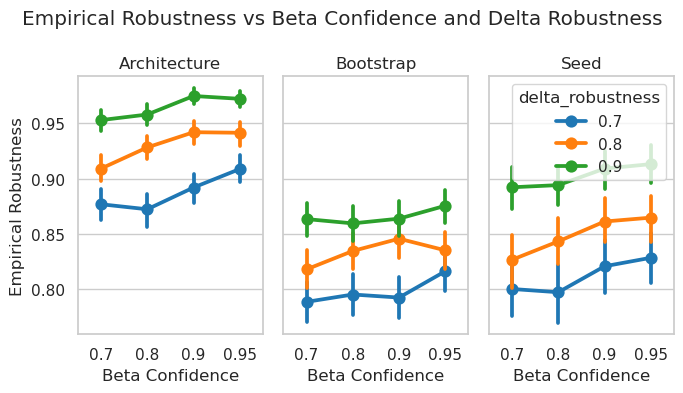

In [32]:
experiments = conf_sweep_raw_df['experiment_type'].unique()

figwidth = 7
fig, axes = plt.subplots(ncols=len(experiments), figsize=(figwidth, 4), sharex=True, sharey=True)

for i, experiment in enumerate(experiments):
    
    ax = axes[i] if len(experiments) > 1 else axes
    
    tmp_conf_df = conf_sweep_raw_df.copy()
    tmp_conf_df = tmp_conf_df[tmp_conf_df['experiment_type'] == experiment]
    
    sns.pointplot(data=tmp_conf_df, 
                  x='beta_confidence', 
                  y='robust_counterfactual_validity_model2', 
                  hue='delta_robustness', 
                  ax=ax,
                  palette='tab10',
                  legend=True if i == len(experiments) - 1 else False
    )
    
    ax.set_title(experiment)
    ax.set_xlabel('Beta Confidence')
    if i == 0:
        ax.set_ylabel('Empirical Robustness')
        
    plt.suptitle('Empirical Robustness vs Beta Confidence and Delta Robustness')
    
plt.tight_layout()
plt.savefig(f'{images_dir}/4_1_empirical_robustness_vs_beta_confidence_and_delta.png', dpi=300, bbox_inches='tight')
    
   

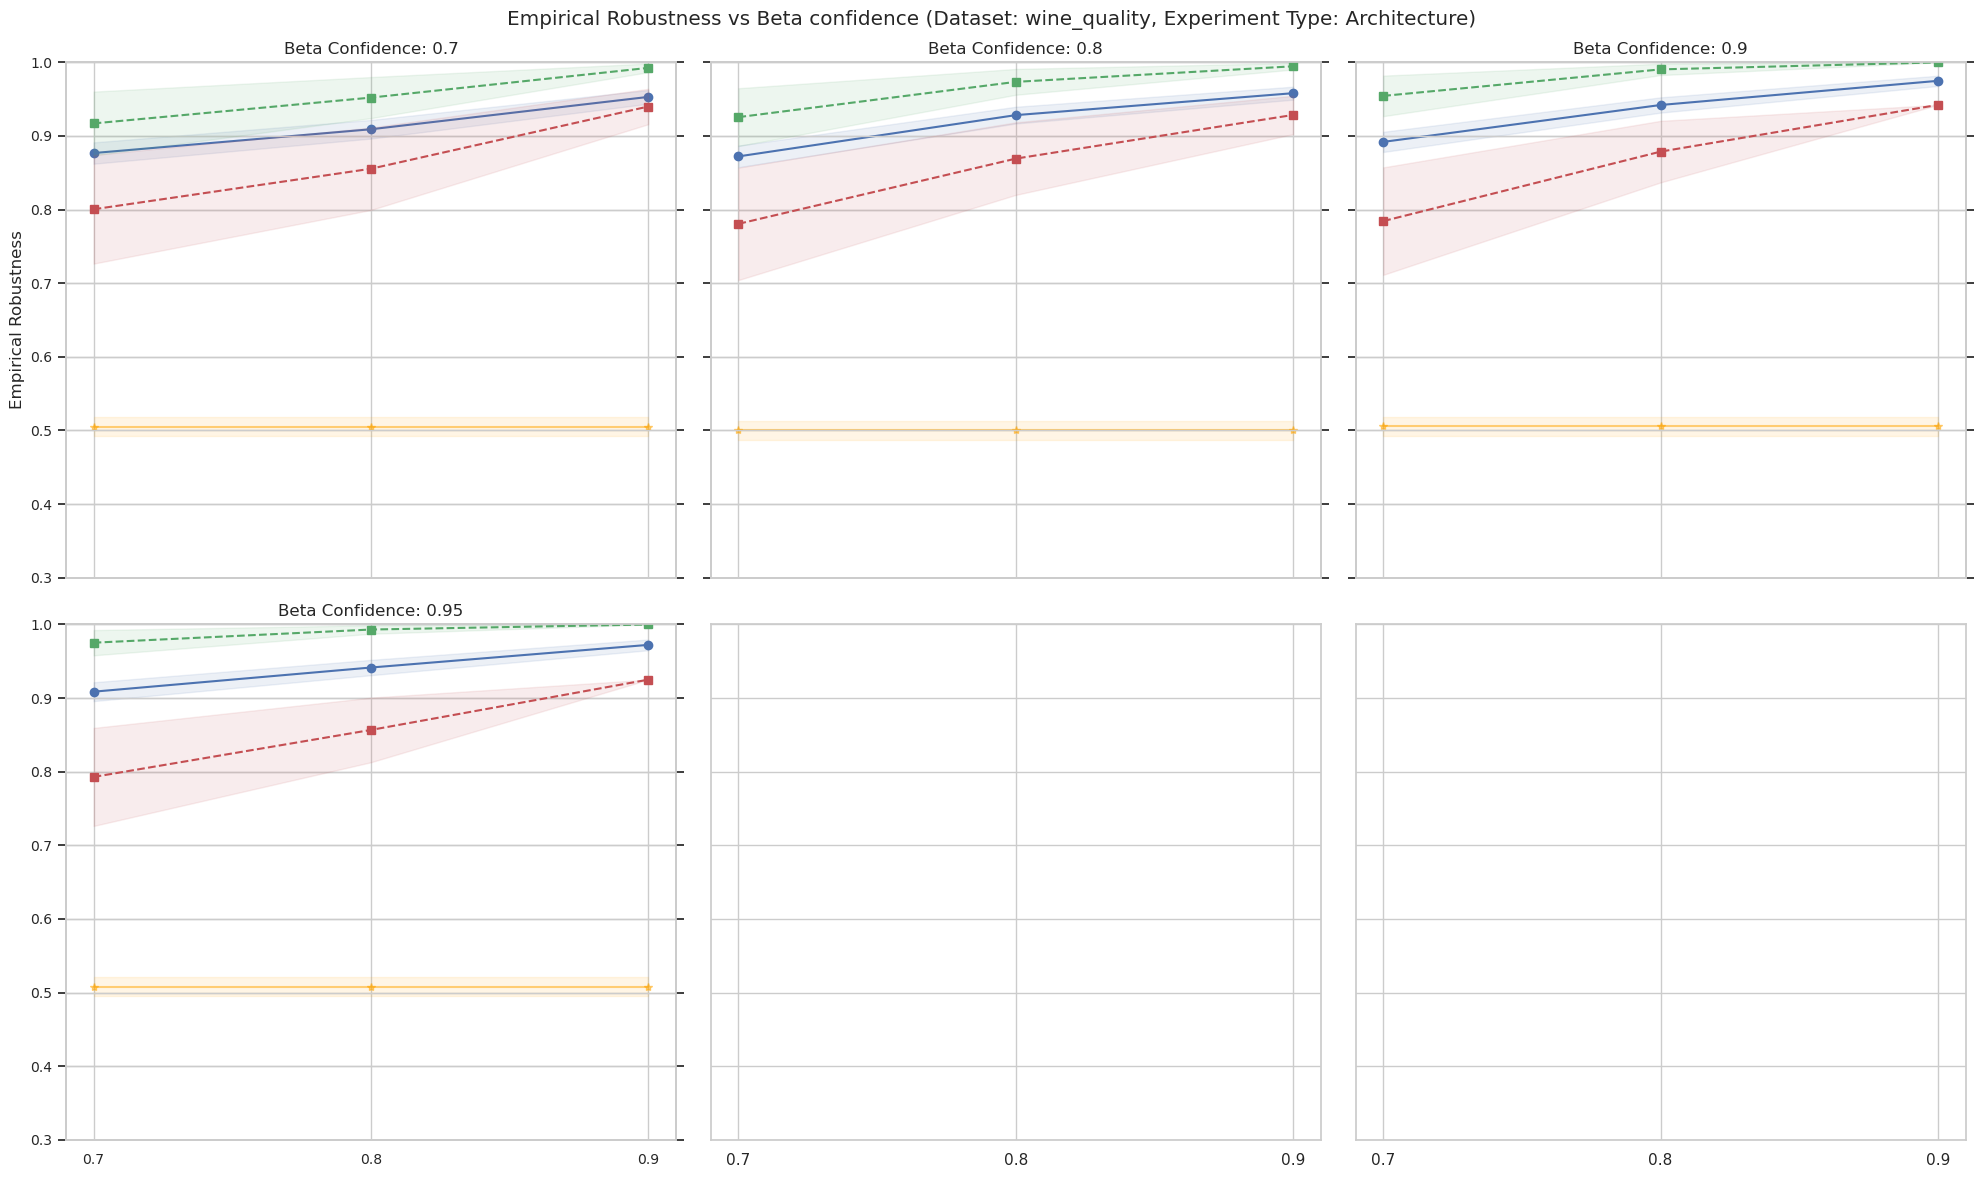

In [33]:
# Use only matplotlib 
# x-axis: delta_robsutness
# y-axis: empirical robustness
# twin y-axis: CI lower and upper bounds
# row: dataset
# col: experiment type

_tmp_df = conf_sweep_raw_df.copy()
_tmp_df = _tmp_df[_tmp_df['experiment_type'] == 'Architecture']
method='GrowingSpheres'

conf = sorted(_tmp_df['beta_confidence'].unique().tolist())
delta_robustness = _tmp_df['delta_robustness'].unique().tolist()
delta_robustness.sort()
# Set fontsize to 11

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12), sharex=True, sharey=True)
axes = axes.flatten()


for i, c in enumerate(conf):
    _df = _tmp_df[(_tmp_df['beta_confidence'] == c)]
    
    data = _df.groupby('delta_robustness')['robust_counterfactual_validity_model2'].mean()
    ax = axes[i]
    ax.plot(delta_robustness, data, marker='o', linestyle='-', color='b', label='Empirical Robustness')
    emprob_ci = 1.96 * _df.groupby('delta_robustness')['robust_counterfactual_validity_model2'].std() / np.sqrt(_df.groupby('delta_robustness')['robust_counterfactual_validity_model2'].count())
    ax.fill_between(delta_robustness, data - emprob_ci, data + emprob_ci, color='b', alpha=0.1, label='Empirical Robustness 95% CI')
    
    ax.set_title(f'Beta Confidence: {c}')
    
    if i >= 4:
        ax.set_xlabel('Delta Robustness')
    # ax.set_xlabel('Delta Robustness')
    if i == 0 or i == 4:
        ax.set_ylabel('Empirical Robustness')
    
    
    data_lower = _df.groupby('delta_robustness')['lower_bound_beta'].mean()
    data_upper = _df.groupby('delta_robustness')['upper_bound_beta'].mean()
    
    ax2 = ax.twinx()
    
    ax2.plot(delta_robustness, data_lower, marker='s', linestyle='--', color='r', label='CI Lower Bound')
    # add yerr for lower bound
    lb_std = _df.groupby('delta_robustness')['lower_bound_beta'].std()
    ax2.fill_between(delta_robustness, data_lower - lb_std, data_lower + lb_std, color='r', alpha=0.1, label='CI Lower Bound Std')


    
    ax2.plot(delta_robustness, data_upper, marker='s', linestyle='--', color='g', label='CI Upper Bound')
    # add yerr
    ub_std = _df.groupby('delta_robustness')['upper_bound_beta'].std()
    ax2.fill_between(delta_robustness, data_upper - ub_std, data_upper + ub_std, color='g', alpha=0.1, label='CI Upper Bound Std')
    
    
    if j == len(experiment_types) - 1:
        ax2.set_ylabel('CI Bounds')
    
    # sns.stripplot(data=_df.sample(500), x='delta_robustness', y='lower_bound_beta', ax=ax2, color='r', alpha=0.5)
    # sns.stripplot(data=_df.sample(500), x='delta_robustness', y='upper_bound_beta', ax=ax2, color='g', alpha=0.5)
    
    
    #Plot baseline
    for m, color in zip(['GrowingSpheres'], ['orange']):
        __df = _df[_df['base_cf_method'] == m]
        base = __df['base_counterfactual_validity_model2'].mean()
        base_std = __df['base_counterfactual_validity_model2'].std()
        base_ci = 1.96 * base_std / np.sqrt(__df['base_counterfactual_validity_model2'].count())
        ax.plot(delta_robustness, [base] * len(delta_robustness), color=color, linestyle='-', label=f'{m} CF', marker='*', alpha=0.5)
        ax.fill_between(delta_robustness, base - base_ci, base + base_ci, color=color, alpha=0.1, label=f'{m} CF 95% CI')
    
    l = 0.3
    ax.set_ylim(l, 1)
    ax2.set_ylim(l, 1)
    ax.set_xticks([0.7, 0.8, 0.9])
    # Make x-axis labels more coarse i.e. only show rounded to tenths

    # ax_lim = ax.get_xlim()
    # ax.set_xticks(np.arange(ax_lim[0], ax_lim[1], 0.1).round(1))
    
    # if i == 3:
    #     ax_legend_handles, ax_legend_labels = ax.get_legend_handles_labels()
    #     ax2_legend_handles, ax2_legend_labels = ax2.get_legend_handles_labels()
        
    #     ax.legend(ax_legend_handles + ax2_legend_handles, 
    #                 ax_legend_labels + ax2_legend_labels, 
    #                 ncol=5, 
    #                 loc='lower right',
    #                 bbox_to_anchor=(3, -0.5)
    #     )
        
        
    # Decrease font size of the labels
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax2.tick_params(axis='both', which='major', labelsize=10)
    
    # Turn off label ticks for ax2 on the plots that are not on the right
    if j != len(experiment_types) - 1:
        ax2.set_yticklabels([])


dataset =  _tmp_df['dataset_name'].unique()[0]
experiment_type = _tmp_df['experiment_type'].unique()[0]
plt.suptitle(f'Empirical Robustness vs Beta confidence (Dataset: {dataset}, Experiment Type: {experiment_type})')        
plt.savefig(f'{images_dir}/4_1_empirical_robustness_ci_bounds_vs_confidence.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()


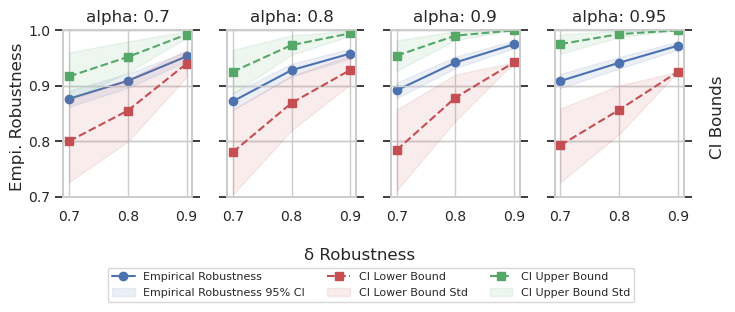

In [34]:
# Use only matplotlib 
# x-axis: delta_robsutness
# y-axis: empirical robustness
# twin y-axis: CI lower and upper bounds
# row: dataset
# col: experiment type

_tmp_df = conf_sweep_raw_df.copy()
_tmp_df = _tmp_df[_tmp_df['experiment_type'] == 'Architecture']
method='GrowingSpheres'

conf = sorted(_tmp_df['beta_confidence'].unique().tolist())
delta_robustness = _tmp_df['delta_robustness'].unique().tolist()
delta_robustness.sort()
# Set fontsize to 11
plt.close()
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(7, 2.5), sharex=True, sharey=True)
axes = axes.flatten()


for i, c in enumerate(conf):
    _df = _tmp_df[(_tmp_df['beta_confidence'] == c)]
    
    data = _df.groupby('delta_robustness')['robust_counterfactual_validity_model2'].mean()
    ax = axes[i]
    ax.plot(delta_robustness, data, marker='o', linestyle='-', color='b', label='Empirical Robustness')
    emprob_ci = 1.96 * _df.groupby('delta_robustness')['robust_counterfactual_validity_model2'].std() / np.sqrt(_df.groupby('delta_robustness')['robust_counterfactual_validity_model2'].count())
    ax.fill_between(delta_robustness, data - emprob_ci, data + emprob_ci, color='b', alpha=0.1, label='Empirical Robustness 95% CI')
    
    ax.set_title(f'alpha: {c}')
    
    data_lower = _df.groupby('delta_robustness')['lower_bound_beta'].mean()
    data_upper = _df.groupby('delta_robustness')['upper_bound_beta'].mean()
    
    ax2 = ax.twinx()
    
    ax2.plot(delta_robustness, data_lower, marker='s', linestyle='--', color='r', label='CI Lower Bound')
    # add yerr for lower bound
    lb_std = _df.groupby('delta_robustness')['lower_bound_beta'].std()
    ax2.fill_between(delta_robustness, data_lower - lb_std, data_lower + lb_std, color='r', alpha=0.1, label='CI Lower Bound Std')


    
    ax2.plot(delta_robustness, data_upper, marker='s', linestyle='--', color='g', label='CI Upper Bound')
    # add yerr
    ub_std = _df.groupby('delta_robustness')['upper_bound_beta'].std()
    ax2.fill_between(delta_robustness, data_upper - ub_std, data_upper + ub_std, color='g', alpha=0.1, label='CI Upper Bound Std')
    
    
    if j == len(experiment_types) - 1:
        ax2.set_ylabel('CI Bounds')
    
    l = 0.7
    ax.set_ylim(l, 1)
    ax2.set_ylim(l, 1)
    ax.set_xticks([0.7, 0.8, 0.9])
    ax.set_yticks([0.7, 0.8, 0.9, 1])
    ax2.set_yticks([0.7, 0.8, 0.9, 1])
        
    # Decrease font size of the labels
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax2.tick_params(axis='both', which='major', labelsize=10)
    
    # Turn off label ticks for ax2 on the plots that are not on the right
    if j != len(experiment_types) - 1:
        ax2.set_yticklabels([])
        
    handles, labels = ax.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    
    handles_combined = handles + handles2
    labels_combined = labels + labels2


# Add one xlabel for all the plots
fig.text(0.5, -0.07, '\u03b4 Robustness', ha='center')
fig.text(0.00, 0.5, 'Empi. Robustness', va='center', rotation='vertical')
fig.text(1.0, 0.5, 'CI Bounds', va='center', rotation='vertical')

fig.legend(bbox_to_anchor=(0.9, -0.08), handles=handles_combined, labels=labels_combined, ncol=3, fontsize=8)
   
plt.savefig(f'{images_dir}/4_1_empirical_robustness_ci_bounds_vs_confidence.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()


<div style="background-color: #AA0000; color: white; text-align: center; font-weight: bold">[4_2] Ablation (confidence sweep)</div>

In [35]:
k_sweep_results_path = results_path + '/k'
k_raw_df = process_results(k_sweep_results_path)

Reading results: 100%|██████████| 3/3 [00:03<00:00,  1.04s/it]


In [36]:
k_raw_df['delta_robustness'].value_counts()

0.7    26263
0.8    26220
0.9    26220
Name: delta_robustness, dtype: int64

In [37]:
k_raw_df['k_mlps_in_B'].value_counts()

8     16200
16    16200
24    10801
48    10800
40    10800
32    10800
56     3102
Name: k_mlps_in_B, dtype: int64

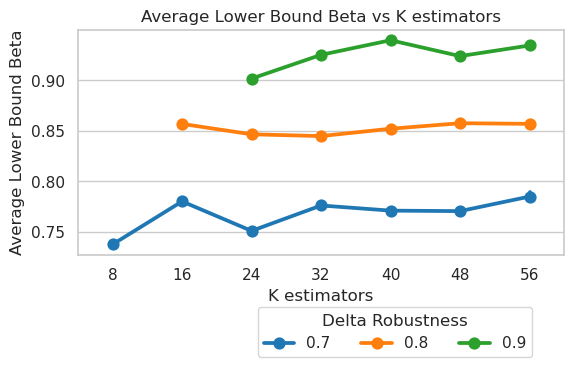

In [38]:
fig, axes = plt.subplots(figsize=(6, 4))

sns.pointplot(data=k_raw_df,
                x='k_mlps_in_B',
                y='lower_bound_beta',
                hue='delta_robustness',
                palette='tab10',
                ax=axes
)

plt.legend(title='Delta Robustness', bbox_to_anchor=(0.95, -0.2), ncol=5)
plt.title('Average Lower Bound Beta vs K estimators')
plt.xlabel('K estimators')
plt.ylabel('Average Lower Bound Beta')
plt.tight_layout()

plt.savefig(f'{images_dir}/4_2_lb_beta_vs_k_mlps.png', dpi=300, bbox_inches='tight')

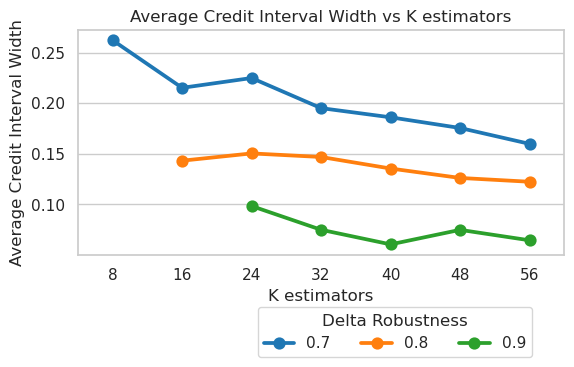

In [39]:
fig, axes = plt.subplots(figsize=(6, 4))

k_raw_df['lb-ub'] = k_raw_df['upper_bound_beta'] - k_raw_df['lower_bound_beta']

sns.pointplot(data=k_raw_df,
                x='k_mlps_in_B',
                y='lb-ub',
                hue='delta_robustness',
                palette='tab10',
                ax=axes
)

plt.legend(title='Delta Robustness', bbox_to_anchor=(0.95, -0.2), ncol=5)
plt.title('Average Credit Interval Width vs K estimators')
plt.xlabel('K estimators')
plt.ylabel('Average Credit Interval Width')
plt.tight_layout()

plt.savefig(f'{images_dir}/4_2_ci_width_vs_k_mlps.png', dpi=300, bbox_inches='tight')

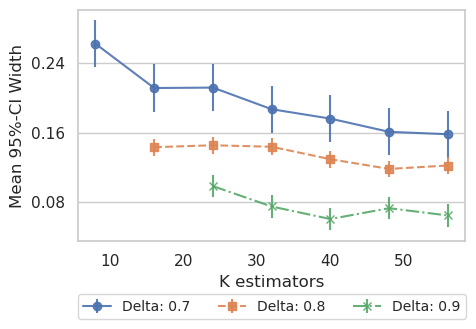

In [40]:
from matplotlib.ticker import FormatStrFormatter

_tmp_df = k_raw_df.copy()
_tmp_df = _tmp_df[_tmp_df['experiment_type'] == 'Architecture']

fig, ax = plt.subplots(figsize=(5, 3))

_tmp_df['lb-ub'] = _tmp_df['upper_bound_beta'] - _tmp_df['lower_bound_beta']
delts = _tmp_df['delta_robustness'].unique()
ks = sorted(_tmp_df['k_mlps_in_B'].unique())
av_ci_width = _tmp_df.groupby(['k_mlps_in_B', 'delta_robustness'])['lb-ub'].mean().reset_index()

markers = ['o', 's', 'x', 'd', '^']
linestyles = ['-', '--', '-.', ':', '-']

for i, delta in enumerate(delts):
    data = av_ci_width[av_ci_width['delta_robustness'] == delta]
    plt.errorbar(data['k_mlps_in_B'], 
                 data['lb-ub'], 
                 marker=markers[i],
                 linestyle=linestyles[i],
                 label=f'Delta: {delta}', 
                 yerr=1.96 * data['lb-ub'].std() / np.sqrt(data['lb-ub'].count()),
                 alpha=0.9
    )

# format y-axis to round to 2 decimal places
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# leave only 4 ticks on the y-axis
ax.yaxis.set_major_locator(plt.MaxNLocator(4))

# Remove vertical gridlines
ax.grid(axis='x')

plt.legend(bbox_to_anchor=(1.02, -0.2), ncol=5, fontsize=10)
# plt.suptitle('Average Credit Interval Width vs K estimators')
plt.xlabel('K estimators')
plt.ylabel('Mean 95%-CI Width')
# plt.tight_layout()

plt.savefig(f'{images_dir}/4_2_ci_width_vs_k_mlps.png', dpi=300, bbox_inches='tight')

/tmp/ipykernel_10938/2299096070.py:108: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


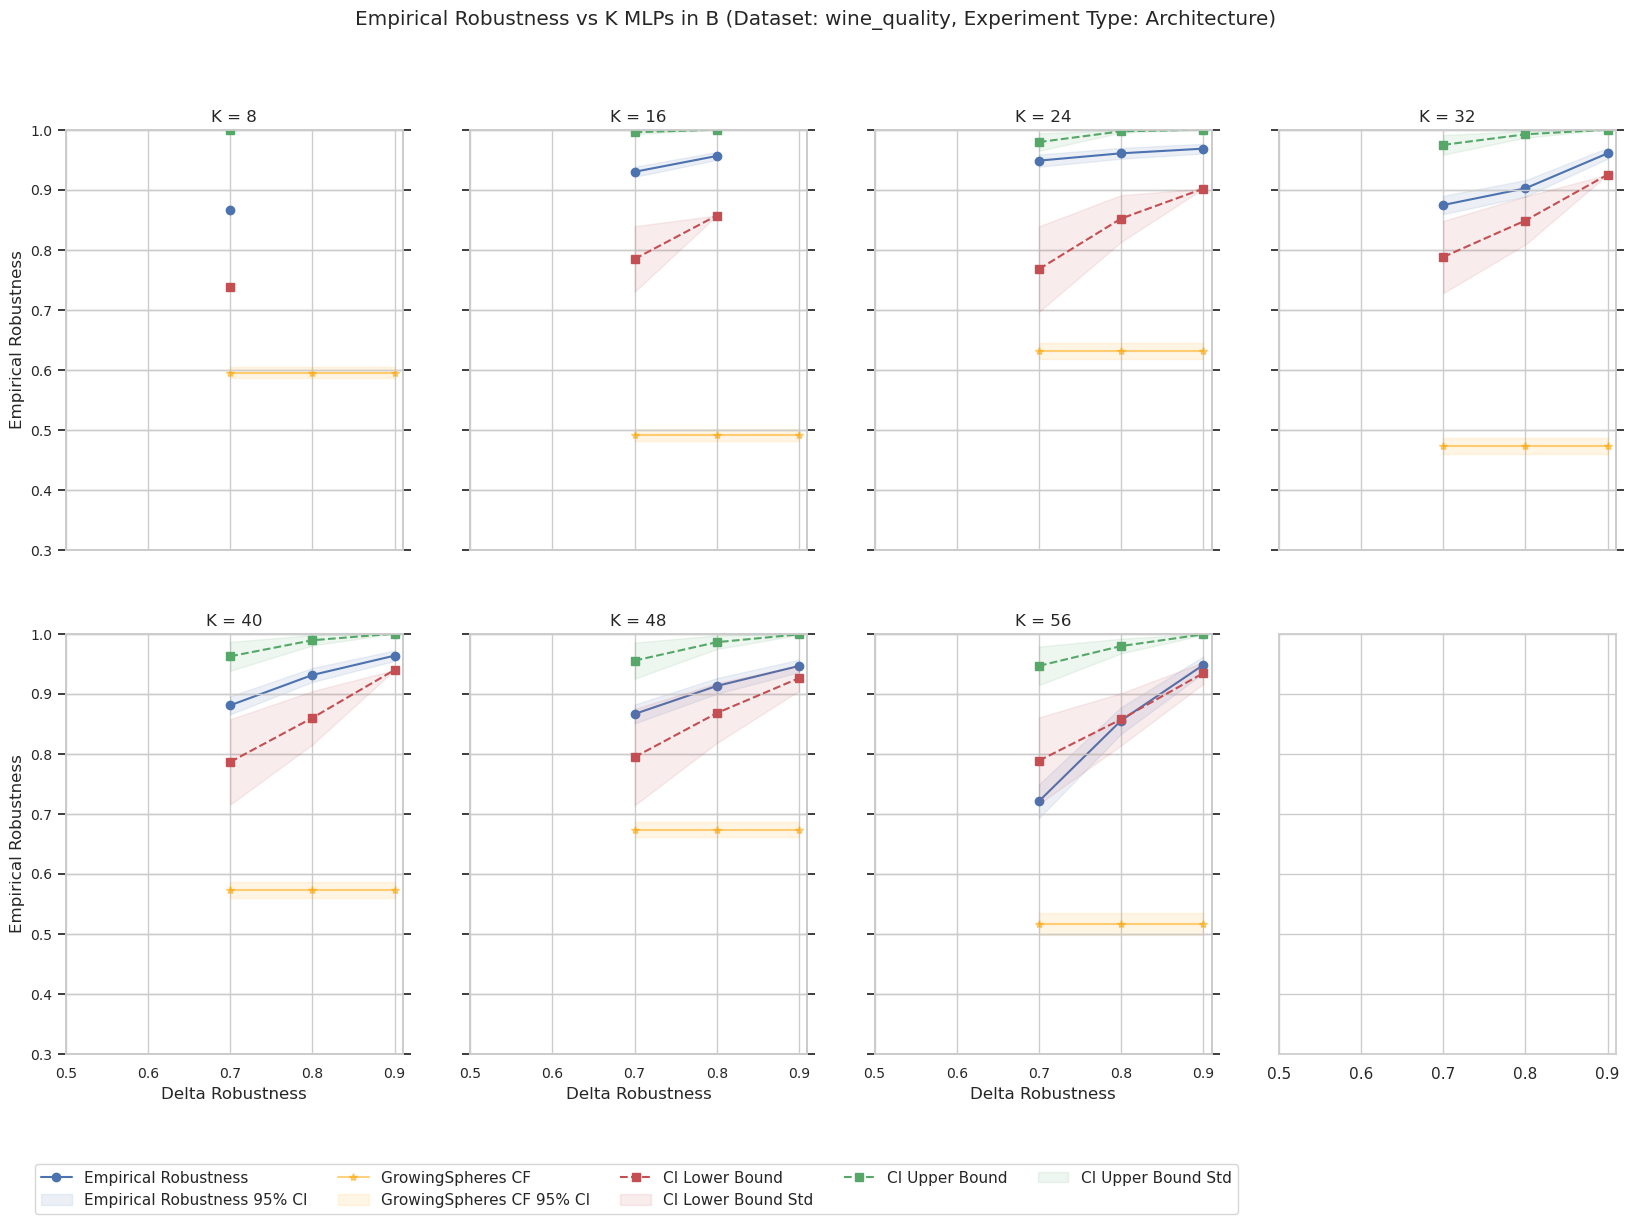

In [41]:
# Use only matplotlib 
# x-axis: delta_robsutness
# y-axis: empirical robustness
# twin y-axis: CI lower and upper bounds
# row: dataset
# col: experiment type

_tmp_df = k_raw_df.copy()
_tmp_df = _tmp_df[_tmp_df['experiment_type'] == 'Architecture']
method='GrowingSpheres'

ks = sorted(_tmp_df['k_mlps_in_B'].unique().tolist())
delta_robustness = _tmp_df['delta_robustness'].unique().tolist()
delta_robustness.sort()
# Set fontsize to 11

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 12), sharex=True, sharey=True)
axes = axes.flatten()


for i, k in enumerate(ks):
    _df = _tmp_df[(_tmp_df['k_mlps_in_B'] == k)]
    
    data = _df.groupby('delta_robustness')['robust_counterfactual_validity_model2'].mean()
    ax = axes[i]
    ax.plot(delta_robustness, data, marker='o', linestyle='-', color='b', label='Empirical Robustness')
    emprob_ci = 1.96 * _df.groupby('delta_robustness')['robust_counterfactual_validity_model2'].std() / np.sqrt(_df.groupby('delta_robustness')['robust_counterfactual_validity_model2'].count())
    ax.fill_between(delta_robustness, data - emprob_ci, data + emprob_ci, color='b', alpha=0.1, label='Empirical Robustness 95% CI')
    
    ax.set_title(f'K = {k}')
    
    if i >= 4:
        ax.set_xlabel('Delta Robustness')
    # ax.set_xlabel('Delta Robustness')
    if i == 0 or i == 4:
        ax.set_ylabel('Empirical Robustness')
    
    
    data_lower = _df.groupby('delta_robustness')['lower_bound_beta'].mean()
    data_upper = _df.groupby('delta_robustness')['upper_bound_beta'].mean()
    
    ax2 = ax.twinx()
    
    ax2.plot(delta_robustness, data_lower, marker='s', linestyle='--', color='r', label='CI Lower Bound')
    # add yerr for lower bound
    lb_std = _df.groupby('delta_robustness')['lower_bound_beta'].std()
    ax2.fill_between(delta_robustness, data_lower - lb_std, data_lower + lb_std, color='r', alpha=0.1, label='CI Lower Bound Std')


    
    ax2.plot(delta_robustness, data_upper, marker='s', linestyle='--', color='g', label='CI Upper Bound')
    # add yerr
    ub_std = _df.groupby('delta_robustness')['upper_bound_beta'].std()
    ax2.fill_between(delta_robustness, data_upper - ub_std, data_upper + ub_std, color='g', alpha=0.1, label='CI Upper Bound Std')
    
    
    if j == len(experiment_types) - 1:
        ax2.set_ylabel('CI Bounds')
    
    # sns.stripplot(data=_df.sample(500), x='delta_robustness', y='lower_bound_beta', ax=ax2, color='r', alpha=0.5)
    # sns.stripplot(data=_df.sample(500), x='delta_robustness', y='upper_bound_beta', ax=ax2, color='g', alpha=0.5)
    
    
    #Plot baseline
    for m, color in zip(['GrowingSpheres'], ['orange']):
        __df = _df[_df['base_cf_method'] == m]
        base = __df['base_counterfactual_validity_model2'].mean()
        base_std = __df['base_counterfactual_validity_model2'].std()
        base_ci = 1.96 * base_std / np.sqrt(__df['base_counterfactual_validity_model2'].count())
        ax.plot(delta_robustness, [base] * len(delta_robustness), color=color, linestyle='-', label=f'{m} CF', marker='*', alpha=0.5)
        ax.fill_between(delta_robustness, base - base_ci, base + base_ci, color=color, alpha=0.1, label=f'{m} CF 95% CI')
    
    l = 0.3
    ax.set_ylim(l, 1)
    ax2.set_ylim(l, 1)
    ax.set_xticks([0.5, 0.6, 0.7, 0.8, 0.9])
    # Make x-axis labels more coarse i.e. only show rounded to tenths

    # ax_lim = ax.get_xlim()
    # ax.set_xticks(np.arange(ax_lim[0], ax_lim[1], 0.1).round(1))
    
    if i == 4:
        ax_legend_handles, ax_legend_labels = ax.get_legend_handles_labels()
        ax2_legend_handles, ax2_legend_labels = ax2.get_legend_handles_labels()
        
        ax.legend(ax_legend_handles + ax2_legend_handles, 
                    ax_legend_labels + ax2_legend_labels, 
                    ncol=5, 
                    loc='lower right',
                    bbox_to_anchor=(3.5, -0.4)
        )
        
        
    # Decrease font size of the labels
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax2.tick_params(axis='both', which='major', labelsize=10)
    
    # Turn off label ticks for ax2 on the plots that are not on the right
    if j != len(experiment_types) - 1:
        ax2.set_yticklabels([])


dataset =  _tmp_df['dataset_name'].unique()[0]
experiment_type = _tmp_df['experiment_type'].unique()[0]
plt.suptitle(f'Empirical Robustness vs K MLPs in B (Dataset: {dataset}, Experiment Type: {experiment_type})')        
plt.savefig(f'{images_dir}/4_2_empirical_robustness_ci_bounds_vs_k.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()


<div style="background-color: #AA0000; color: white; text-align: center; font-weight: bold">[4_3] Ablation (generalizations)</div>

In [42]:
generalization_results_path = results_path + '/generalization'
gen_raw_df = process_results(generalization_results_path)

Reading results: 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]


In [43]:
gen_raw_df['experiment_type'].value_counts()

Architecture    10301
Name: experiment_type, dtype: int64

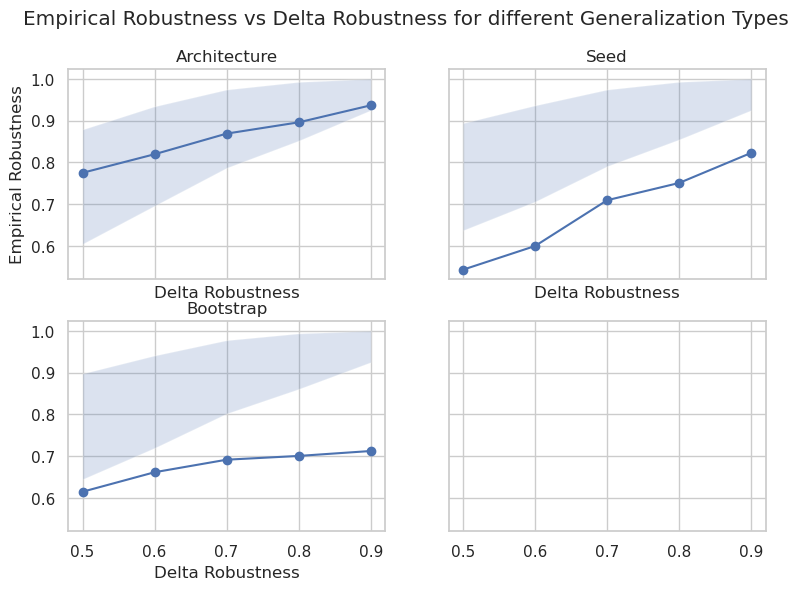

In [44]:
generalizations = gen_raw_df['experiment_generalization_type'].unique()
experiments = gen_raw_df['experiment_type'].unique()

cols = len(generalizations) // 2 + 1
fig, axes = plt.subplots(ncols=cols, nrows=2, figsize=(9, 6), sharex=True, sharey=True)
axes = axes.flatten()
for i, gen in enumerate(generalizations):
    for j, experiment in enumerate(experiments):
        tmp_gen_df = gen_raw_df.copy()
        tmp_gen_df = tmp_gen_df[(tmp_gen_df['experiment_type'] == experiment) & (tmp_gen_df['experiment_generalization_type'] == gen)]

        lbs = tmp_gen_df['lower_bound_beta']
        ubs = tmp_gen_df['upper_bound_beta']
        
        tmp_grp = tmp_gen_df.groupby('delta_robustness')['robust_counterfactual_validity_model2'].mean()

        axes[i].plot(tmp_grp.index, tmp_grp, marker='o', linestyle='-', label=experiment)
        
        tmp_grp_lower = tmp_gen_df.groupby('delta_robustness')['lower_bound_beta'].mean()
        tmp_grp_upper = tmp_gen_df.groupby('delta_robustness')['upper_bound_beta'].mean()
        
        axes[i].fill_between(tmp_grp.index, tmp_grp_lower, tmp_grp_upper, alpha=0.2, label='CredInt Bounds (average)')
        
        axes[i].set_title(gen)
        axes[i].set_xlabel('Delta Robustness')
        
        if i == 0:
            axes[i].set_ylabel('Empirical Robustness')
            
        if i == 3:
            axes[i].legend(title='Base experiment type', loc='upper left', ncol=2, bbox_to_anchor=(0.5, -0.3))
        
            
plt.suptitle('Empirical Robustness vs Delta Robustness for different Generalization Types')

# plt.tight_layout()

plt.savefig(f'{images_dir}/4_3_empirical_robustness_vs_delta_generalization.png', dpi=300, bbox_inches='tight')
        

<div style="background-color: #AA0000; color: white; text-align: center; font-weight: bold">[5] Time</div>

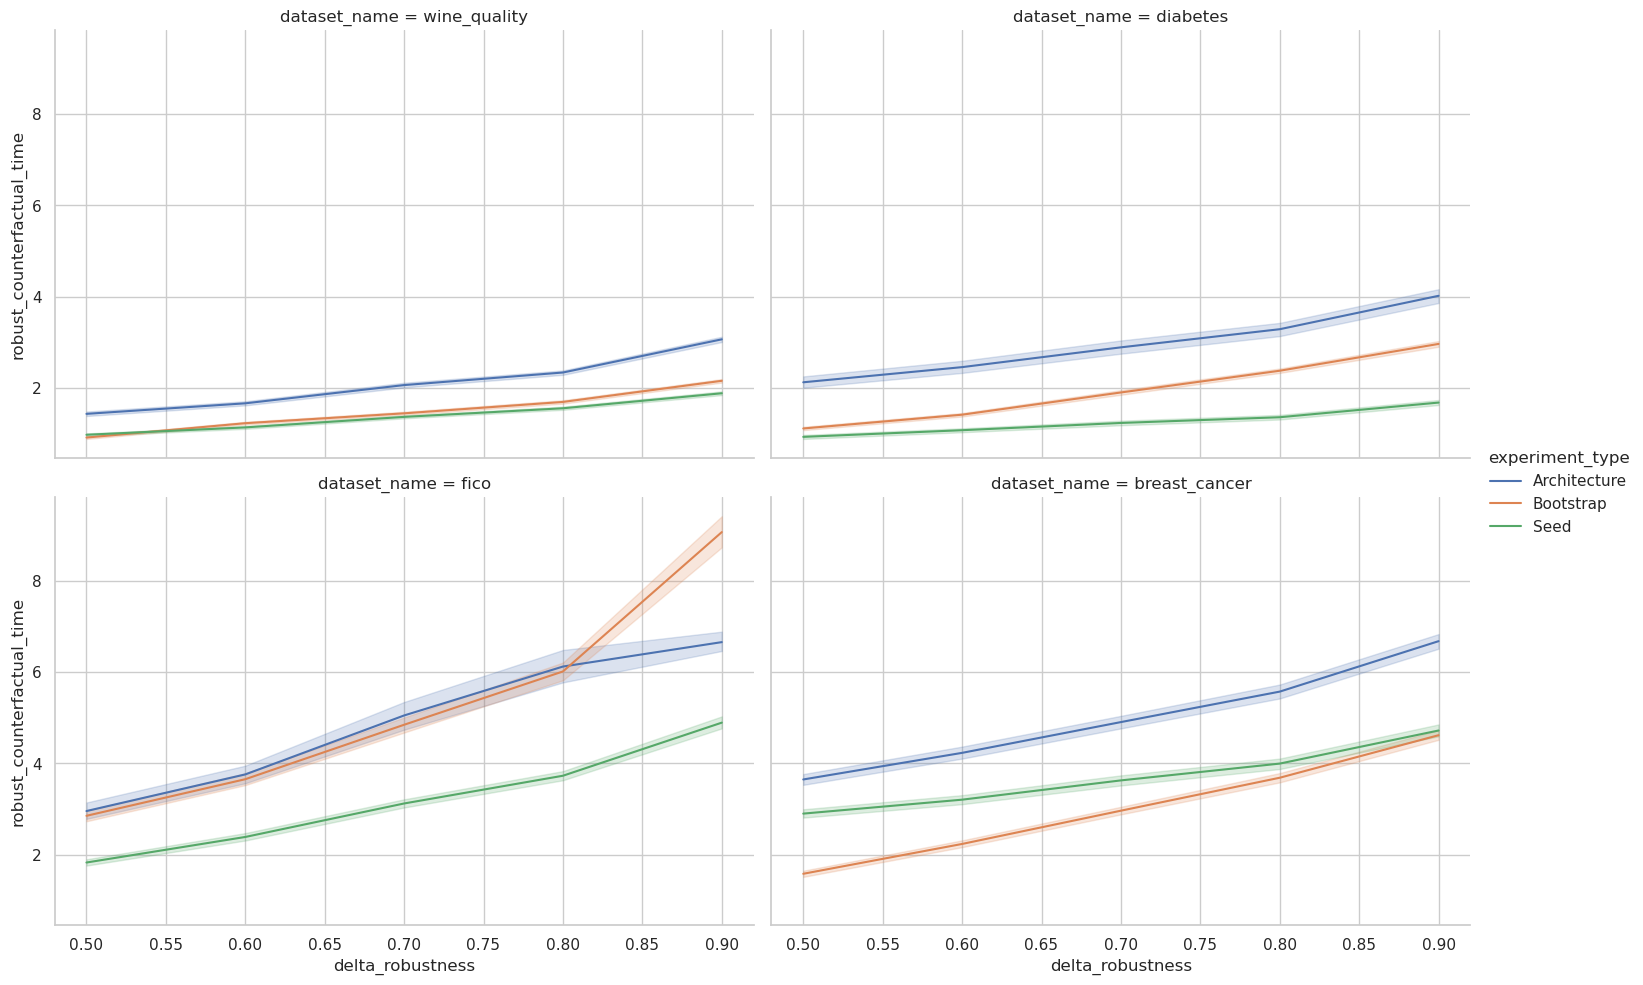

In [45]:
sns.relplot(data=nn_gs_df, x='delta_robustness', y='robust_counterfactual_time', hue='experiment_type', col='dataset_name', kind='line', height=5, aspect=1.5, col_wrap=2)
# plt.xlabel('Delta Robustness')
# plt.ylabel('Robust CF generation time (s)')
plt.savefig(f'{images_dir}/5_1_robust_cf_generation_time_delta.png', dpi=300, bbox_inches='tight')

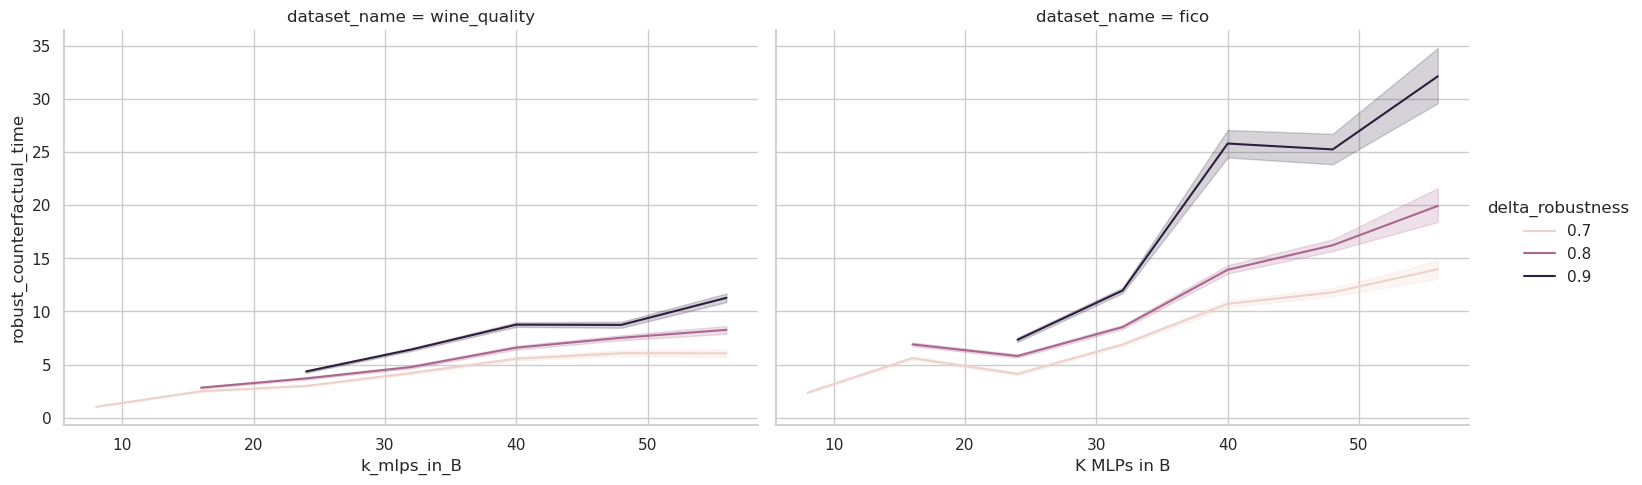

In [46]:
sns.relplot(data=k_raw_df, x='k_mlps_in_B', y='robust_counterfactual_time', hue='delta_robustness', col='dataset_name', kind='line', height=5, aspect=1.5)
plt.xlabel('K MLPs in B')
plt.ylabel('Robust CF generation time (s)')
plt.savefig(f'{images_dir}/5_2_robust_cf_generation_time_k.png', dpi=300, bbox_inches='tight')

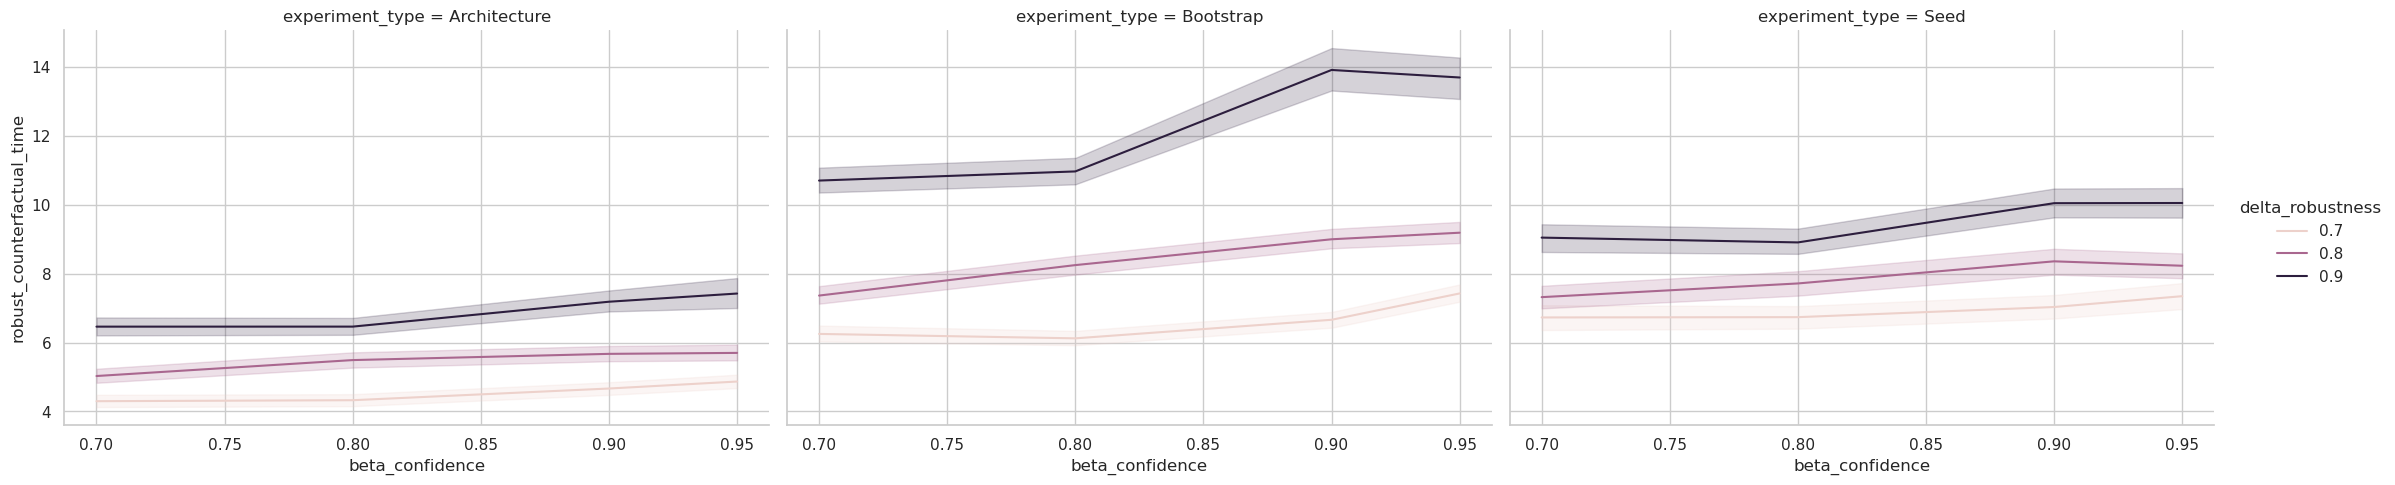

In [47]:
sns.relplot(data=conf_sweep_raw_df, x='beta_confidence', y='robust_counterfactual_time', hue='delta_robustness', col='experiment_type', kind='line', height=5, aspect=1.5)
plt.savefig(f'{images_dir}/5_3_robust_cf_generation_time_beta_confidence.png', dpi=300, bbox_inches='tight')

In [62]:
# Create a scatterplot time vs empirical robustness
cutoff_up = 0.8
cutoff_low = 0.2
exp = 'Seed'

# Print average time for each experiment type
print('BetaROB Time')
tmp_beta = raw_df[raw_df['experiment_type'] == exp] 
quantile80 = tmp_beta['robust_counterfactual_time'].quantile(cutoff_up)
quantile20 = tmp_beta['robust_counterfactual_time'].quantile(cutoff_low)
tmp_beta = tmp_beta[tmp_beta['robust_counterfactual_time'] < quantile80]
tmp_beta = tmp_beta[tmp_beta['robust_counterfactual_time'] > quantile20]
print(tmp_beta.groupby(['experiment_type', 'dataset_name'])['robust_counterfactual_time'].mean().sort_index())

print('RobX Time')
tmp_robx = robx_raw_df[robx_raw_df['experiment_type'] == exp]
quantile80 = tmp_robx['robust_counterfactual_time'].quantile(cutoff_up)
quantile20 = tmp_robx['robust_counterfactual_time'].quantile(cutoff_low)
tmp_robx = tmp_robx[tmp_robx['robust_counterfactual_time'] < quantile80]
tmp_robx = tmp_robx[tmp_robx['robust_counterfactual_time'] > quantile20]
print(tmp_robx.groupby(['experiment_type', 'dataset_name'])['robust_counterfactual_time'].mean().sort_index())

print('Base CF Time')
tmp_base = raw_df[raw_df['experiment_type'] == exp]
quntile80 = tmp_base['base_counterfactual_time'].quantile(cutoff_up)
quantile20 = tmp_base['base_counterfactual_time'].quantile(cutoff_low)
tmp_base = tmp_base[tmp_base['base_counterfactual_time'] < quantile80]
tmp_base = tmp_base[tmp_base['base_counterfactual_time'] > quantile20]
print(tmp_base.groupby(['experiment_type', 'dataset_name'])['base_counterfactual_time'].mean().sort_index())

BetaROB Time
experiment_type  dataset_name 
Seed             breast_cancer    2.178209
                 diabetes         1.307726
                 fico             2.222163
                 wine_quality     1.326638
Name: robust_counterfactual_time, dtype: float64
RobX Time
experiment_type  dataset_name 
Seed             breast_cancer    0.572322
                 diabetes         0.278550
                 fico             0.740911
                 wine_quality     0.646489
Name: robust_counterfactual_time, dtype: float64
Base CF Time
experiment_type  dataset_name 
Seed             breast_cancer    0.099611
                 diabetes         0.047365
                 fico             0.077116
                 wine_quality     0.082889
Name: base_counterfactual_time, dtype: float64
